<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360"/>

### Machine Learning Foundation Project - Shikha Gupta, PhD

## Table of Contents

1. [Problem Statement](#section1)<br/>
2. [Data Loading and Description](#section2)<br/>
    - 2.1 [Importing packages](#section201)<br/>
    - 2.2 [Reading the csv](#section202)<br/>
3. [Data Profiling](#section3)
    - 3.1 [Pre Profiling](#section301)<br/>
    - 3.3 [Initial Observations](#section302)<br/>
4. [Exploring Data via Correlation analysis](#section4)</br>
5. [Feature Selection - Part 1](#section5)</br>
    - 5.1 [Dropping columns with >80% values as missing or zeros](#section501)<br/>
    - 5.2 [Dropping columns based on correlation with SalePrice (correlation coeff value < 0.2)](#section502)<br/>
6. [Filling missing values](#section6)</br>
    - 6.1 [MCAR Values](#section601)<br/>
    - 6.2 [Missing values that are missing  NAR : Filling Mssing NAR based on information from other related columns](#section602)<br/>
    - 6.3 [Filling MCAR values via KNN imputer ](#section603)<br/>
        - 6.3.1 [Using KNN imputer to impute missing values for numerical columns:"LotFrontage" and "MsnVnrArea](#section60301)<br/>
        - 6.3.2 [Encoding Categorical columns ("MasVnrType" and "Electrical") to use KNN imputer](#section60302)<br/>
        - 6.3.3 [Using KNN imputer to impute missing values for encoded categorical columns](#section60303)<br/>
7. [EDA for Numerical Columns](#section7)</br>
8. [Removing Outliers using LOF and Isolation Forest](#section8)</br>
    - 8.1 [Testing LOF for outlier removal](#section801)</br>
    - 8.2 [Testing Isolation Forest for outlier removal](#section802)</br>
9. [Encoding all Categorical Columns to calculate correlation matrix](#section9)</br>
10. [Feature Engineering and Removing Multicolinearlity](#section10)</br>
11. [Linear Regression Models](#section11)</br>
    - 11.1  [Models using dataset without Feature Engineering](#section1101)</br>
        - 11.1.1 [Model1](#section110101)</br>
        - 11.1.2 [Testing Model 1 for heteroscedasticity](#section110102)</br>
        - 11.1.3 [Standardising Data](#section110103)</br>
        - 11.1.4 [Model2 : Building model with Standardised dataset](#section110104)</br>
        - 11.1.5 [Testing Model 2 for heteroscedasticity](#section110105)</br>
        
    - 11.2 [Models using dataset with Engineered Features](#section1102)</br>
        - 11.2.1 [Model 3](#section110201)</br>
        - 11.2.2 [Testing Model 3 for heteroscedasticity](#section110202)</br>
        - 11.2.3 [Standardising data with engineered features](#section110203)</br>
        - 11.2.4 [Model 4](#section110204)</br>
        - 11.2.5 [Testing Model 4 for heteroscedasticity](#section110205)</br>
        
12. [Feature Selection Part 2 : Improving Model 2](#section12)</br>
    - 12.1 [Removing Features(instead of combining) where correlation amongst them is > 0.6](#section1201)</br>
    - 12.2 [Model 5](#section1202)</br>
    - 12.3 [Removing Features with correlation with salePrice < 0.1](#section1203)</br>
    - 12.4 [Model 6](#section1204)</br>
    - 12.5 [Testing Model 6 for heteroscedasticity](#section1205)</br>
    

13. [Final Conclusions](#section13)<br/>  

<a id=section1></a>
## 1. Problem Statement

This notebook explores house prices dataset and will use __Pandas__ to perform  __Exploratory Data Analysis(EDA)__ which includes __cleaning__, __munging__, __combining__, __reshaping__, __slicing__, __dicing__, and __transforming data__ for analysis purpose. 

Followed by EDA, various __ML models__ will be applied and evaluated to help predict the SalePrice of a house based on its features 


<a id=section2></a>
## 2. Data Loading and Description

### 2.1 Importing packages <a id=section201></a>

In [1]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

from subprocess import check_output
from sklearn import metrics

In [2]:
pd.set_option('display.max_rows', 250)
pd.set_option('display.max_columns', 250)
#pd.set_option("display.float_format","{:.1f}".format)

### 2.2 Reading the csv <br id=section202></br>

In [3]:
house = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/house_data.csv")

## 3. Data Profiling <br id=section3 ></br>

In [4]:
house.shape

(1460, 81)

In [5]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
house.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460,1460,1452,1452.000000,1460,1460,1460,1423,1423,1422,1423,1460.000000,1422,1460.000000,1460.000000,1460.000000,1460,1460,1460,1459,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460.000000,1460,1460.000000,770,1379,1379.000000,1379,1460.000000,1460.000000,1379,1379,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,5,3,25,9,8,5,8,NaN,NaN,NaN,NaN,6,8,15,16,4,NaN,4,5,6,4,4,4,6,NaN,6,NaN,NaN,NaN,6,5,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,5,6,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,None,NaN,TA,TA,PConc,TA,TA,No,Unf,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,NaN,NaN,NaN,NaN,1141,1434,515,504,864,NaN,906,1282,647,649,1311,953,430,NaN,1256,NaN,NaN,NaN,1428,741,1365,1334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735,NaN,1360,NaN,380,870,NaN,605,NaN,NaN,1311,1326,1340,NaN,NaN,NaN,NaN,NaN,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.099315,5.575342,1971.267808,1984.865753,NaN,NaN,NaN,NaN,NaN,103.685262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,443.639726,NaN,46.549315,567.240411,1057.429452,NaN,NaN,NaN,NaN,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,NaN,6.517808,NaN,0.613014,NaN,NaN,1978.506164,NaN,1.767123,472.980137,NaN,NaN,NaN,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.382997,1.112799,30.202904,20.645407,NaN,NaN,NaN,NaN,NaN,181.066207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,456.098091,NaN,161.319273,441.866955,438.705324,NaN,NaN,NaN,NaN,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,NaN,1.625393,NaN,0.644666,NaN,NaN,24.689725,NaN,0.747315,213.804841,NaN,NaN,NaN,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,NaN,NaN,1900.000000,NaN

### 3.1 Pre Profiling <br id=section301></br>

In [7]:
#profile = pandas_profiling.ProfileReport(house)
#profile.to_file("house_before_preprocessing.html")

### 3.2 Initial Observations  <br id=section302></br>

1. There are 81 columns/variables with 1460 observations in this data set 
2. There are 6,965 (5.9%) missing values in the data set.
3. There are 48 categorical variables, 32 numerical variables and 1 Boolean variable ("Central Air")
4. Alley, MiscFeature and PoolQC have over 90% values missing and Fence has 81% values missing
5. 3SsnPorch, ScreenPorch, PoolArea,LowQualFinSF and MiscVal have over 90% values as zeros and BsmtFinSF2 and Enclosed Porch have over 85% values as zero


## 4. Exploring Data via Correlation Analysis<br id=section4></br> 

In [8]:
house_copy=house.copy()

In [9]:
house_copy.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Text(0.5, 1, 'Correlation between features')

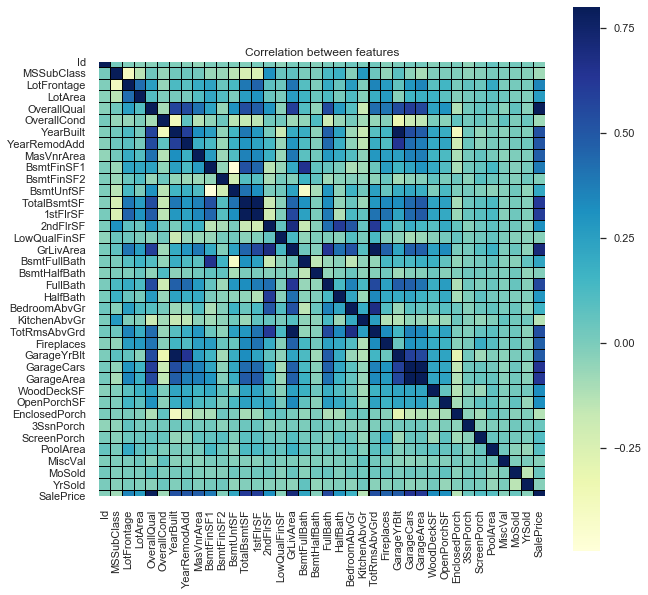

In [10]:
corr = house_copy.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = False,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')

In [11]:
corr_matrix=house_copy.corr().abs()
df=pd.DataFrame(corr_matrix['SalePrice'].sort_values(ascending=False).reset_index())
df

,index,SalePrice
0,SalePrice,1.000000
1,OverallQual,0.790982
2,GrLivArea,0.708624
3,GarageCars,0.640409
4,GarageArea,0.623431
5,TotalBsmtSF,0.613581
6,1stFlrSF,0.605852
7,FullBath,0.560664
8,TotRmsAbvGrd,0.533723
9,YearBuilt,0.522897


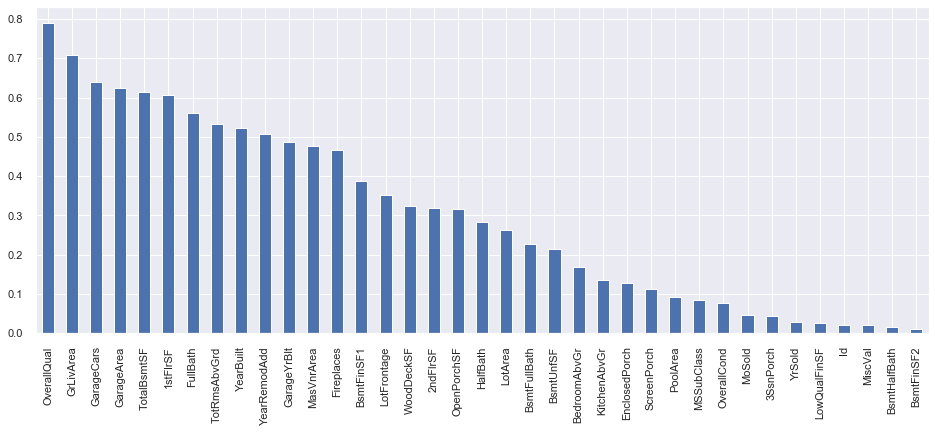

In [12]:
plt.figure(figsize=(16,6))
corr['SalePrice'].abs().sort_values(ascending=False)[1:].plot(kind='bar')

## 5. Feature Selection - Part 1<br id=section5></br>

### 5.1 Dropping columns with >80% values as missing or zeros <br id=section501></br>

1. Since there are too many variables, to build a stable model, it is important to remove the features which are adding noise due to a missing values.  
2. Removing columns with a >80% values as zero, as they are not giving a lot of useful information for the model since most of the houses(obersvations with zero values) do not have these features.

In [13]:
house_copy.drop(["Alley","PoolQC","Fence","MiscFeature"], axis=1, inplace=True)
house_copy.drop(["3SsnPorch", "ScreenPorch", "PoolArea","LowQualFinSF","MiscVal","BsmtFinSF2","EnclosedPorch" ],axis=1, inplace=True)

In [14]:
house_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 70 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non

### 5.2 Dropping columns with a correlation value less than 0.2<br id=section502></br>

Columns with a low correlation with SalePrice are removed since it is important to remove features with low value for the model to reduce the number of variables for a stable model

In [15]:
corr_matrix=house_copy.corr().abs()
df=pd.DataFrame(corr_matrix['SalePrice'].sort_values(ascending=False).reset_index())
df

,index,SalePrice
0,SalePrice,1.000000
1,OverallQual,0.790982
2,GrLivArea,0.708624
3,GarageCars,0.640409
4,GarageArea,0.623431
5,TotalBsmtSF,0.613581
6,1stFlrSF,0.605852
7,FullBath,0.560664
8,TotRmsAbvGrd,0.533723
9,YearBuilt,0.522897


In [16]:
to_drop=df["index"].iloc[23:].tolist()
to_drop

['BedroomAbvGr',
 'KitchenAbvGr',
 'MSSubClass',
 'OverallCond',
 'MoSold',
 'YrSold',
 'Id',
 'BsmtHalfBath']

In [17]:
house_copy.drop(to_drop, axis= 1, inplace = True)

In [18]:
house_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 62 columns):
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1452 non-null object
MasVnrArea       1452 non-null float64
ExterQual        1460

## 6. Filling missing values <br id=section6></br>

### 6.1 MCAR values <br id=section601></br>

In [19]:
#Analysing Missing values for "LotFrontage"
LotF_null1 = pd.isnull(house_copy['LotFrontage'])
house_copy[LotF_null1]

,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,SaleType,SaleCondition,SalePrice
7,RL,NaN,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,216,1107,GasA,Ex,Y,SBrkr,1107,983,2090,1,2,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,WD,Normal,200000
12,RL,NaN,12968,Pave,IR2,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,1962,1962,Hip,CompShg,HdBoard,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,737,Unf,175,912,GasA,TA,Y,SBrkr,912,0,912,1,1,0,TA,4,Typ,0,NaN,Detchd,1962.0,Unf,1,352,TA,TA,Y,140,0,WD,Normal,144000
14,RL,NaN,10920,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,1960,1960,Hip,CompShg,MetalSd,MetalSd,BrkFace,212.0,TA,TA,CBlock,TA,TA,No,BLQ,733,Unf,520,1253,GasA,TA,Y,SBrkr,1253,0,1253,1,1,1,TA,5,Typ,1,Fa,Attchd,1960.0,RFn,1,352,TA,TA,Y,0,213,WD,Normal,157000
16,RL,NaN,11241,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,1970,1970,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,ALQ,578,Unf,426,1004,GasA,Ex,Y,SBrkr,1004,0,1004,1,1,0,TA,5,Typ,1,TA,Attchd,1970.0,Fin,2,480,TA,TA,Y,0,0,WD,Normal,149000
24,RL,NaN,8246,Pave,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,1968,2001,Gable,CompShg,Plywood,Plywood,None,0.0,TA,Gd,CBlock,TA,TA,Mn,Rec,188,ALQ,204,1060,GasA,Ex,Y,SBrkr,1060,0,1060,1,1,0,Gd,6,Typ,1,TA,Attchd,1968.0,Unf,1,270,TA,TA,Y,406,90,WD,Normal,154000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429,RL,NaN,12546,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,1981,1981,Gable,CompShg,MetalSd,MetalSd,BrkFace,310.0,Gd,Gd,CBlock,Gd,TA,No,BLQ,678,Unf,762,1440,GasA,Ex,Y,SBrkr,1440,0,1440,0,2,0,Gd,7,Typ,1,TA,Attchd,1981.0,Fin,2,467,TA,TA,Y,0,0,WD,Normal,182900
1431,RL,NaN,4928,Pave,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,LwQ,958,Unf,0,958,GasA,TA,Y,SBrkr,958,0,958,0,2,0,TA,5,Typ,0,NaN,Attchd,1976.0,RFn,2,440,TA,TA,Y,0,60,WD,Normal,143750
1441,RM,NaN,4426,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,TwnhsE,1Story,6,2004,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,147.0,Gd,TA,PConc,Gd,TA,Av,GLQ,697,Unf,151,848,GasA,Ex,Y,SBrkr,848,0,848,1,1,0,Gd,3,Typ,1,TA,Attchd,2004.0,RFn,2,420,TA,TA,Y,149,0,WD,Normal,149300
1443,RL,NaN,8854,Pave,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Unf,6,1916,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,952,952,Grav,Fa,N,FuseF,952,0,952,0,1,0,Fa,4,Typ,1,Gd,Detchd,1916.0,Unf,1,192,Fa,Po,P,0,98,WD,Normal,121000


LotFrontage column is missing values that seem to be MCAR - hence will be filled using a KNN imputer 
[Goto section 6.2](#section602)<br/>

In [20]:
#Analysing missing values for "MasVnrArea" and "MasVnrType"
house_copy["MasVnrArea"].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [21]:
house_copy["MasVnrArea"].mode()

0    0.0
dtype: float64

In [22]:
house_copy["MasVnrType"].mode()

0    None
dtype: object

In [23]:
mas_null=pd.isnull(house_copy["MasVnrArea"])
house_copy[mas_null]

,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,SaleType,SaleCondition,SalePrice
234,RL,NaN,7851,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,625,Unf,235,860,GasA,Ex,Y,SBrkr,860,1100,1960,1,2,1,Gd,8,Typ,2,TA,BuiltIn,2002.0,Fin,2,440,TA,TA,Y,288,48,WD,Normal,216500
529,RL,NaN,32668,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Crawfor,Norm,Norm,1Fam,1Story,6,1957,1975,Hip,CompShg,Wd Sdng,Stone,NaN,NaN,Gd,TA,PConc,TA,TA,No,Rec,1219,Unf,816,2035,GasA,TA,Y,SBrkr,2515,0,2515,1,3,0,TA,9,Maj1,2,TA,Attchd,1975.0,RFn,2,484,TA,TA,Y,0,0,WD,Alloca,200624
650,FV,65.0,8125,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,2007,2007,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,813,813,GasA,Ex,Y,SBrkr,822,843,1665,0,2,1,Gd,7,Typ,0,NaN,Attchd,2007.0,RFn,2,562,TA,TA,Y,0,0,WD,Normal,205950
936,RL,67.0,10083,Pave,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,2003,2003,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,833,Unf,343,1176,GasA,Ex,Y,SBrkr,1200,0,1200,1,2,0,Gd,5,Typ,0,NaN,Attchd,2003.0,RFn,2,555,TA,TA,Y,0,41,WD,Normal,184900
973,FV,95.0,11639,Pave,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,2007,2008,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,1428,1428,GasA,Ex,Y,SBrkr,1428,0,1428,0,2,0,Gd,6,Typ,0,NaN,Attchd,2007.0,Fin,2,480,TA,TA,Y,0,120,New,Partial,182000
977,FV,35.0,4274,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,1Story,7,2006,2007,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,1106,Unf,135,1241,GasA,Ex,Y,SBrkr,1241,0,1241,1,1,1,Gd,4,Typ,0,NaN,Attchd,2007.0,Fin,2,569,TA,TA,Y,0,116,New,Partial,199900
1243,RL,107.0,13891,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,2006,2006,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Ex,TA,PConc,Ex,Gd,Gd,GLQ,1386,Unf,690,2076,GasA,Ex,Y,SBrkr,2076,0,2076,1,2,1,Ex,7,Typ,1,Gd,Attchd,2006.0,Fin,3,850,TA,TA,Y,216,229,New,Partial,465000
1278,RL,75.0,9473,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,8,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,804,Unf,324,1128,GasA,Ex,Y,SBrkr,1128,903,2031,1,2,1,Gd,7,Typ,1,Gd,Attchd,2002.0,RFn,2,577,TA,TA,Y,0,211,WD,Normal,237000


__"MasVnrArea"__ and __"MasVnrType"__ both have the same 8 observations with missing values but they seem to __MCAR__. Hence will be imputed using KNN imputer
[Goto section 6.2](#section602)<br/>

In [24]:
#Analysing missing value for "Electrical"
elec_null=pd.isnull(house_copy["Electrical"])
house_copy[elec_null]

,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,SaleType,SaleCondition,SalePrice
1379,RL,73.0,9735,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,384,384,GasA,Gd,Y,NaN,754,640,1394,0,2,1,Gd,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2,400,TA,TA,Y,100,0,WD,Normal,167500


__"Electrical"__ has 1 missing value which seem to be __MCAR__. Hence will be imputed using KNN imputer
[Goto section 6.2](#section602)<br/>

### 6.2 Missing values that are missing NAR :  Filling NAR missing values based on information in other related columns <br id=section602></br> 

In [25]:
# Analysing Missing values in "BsmtQual"
bsmt_null=pd.isnull(house_copy["BsmtQual"])
house_copy[bsmt_null]

,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,SaleType,SaleCondition,SalePrice
17,RL,72.0,10791,Pave,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,4,1967,1967,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,GasA,TA,Y,SBrkr,1296,0,1296,0,2,0,TA,6,Typ,0,NaN,CarPort,1967.0,Unf,2,516,TA,TA,Y,0,0,WD,Normal,90000
39,RL,65.0,6040,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,4,1955,1955,Gable,CompShg,AsbShng,Plywood,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NaN,0,0,GasA,TA,N,FuseP,1152,0,1152,0,2,0,Fa,6,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,WD,AdjLand,82000
90,RL,60.0,7200,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,1950,1950,Gable,CompShg,BrkFace,Wd Sdng,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,GasA,TA,Y,FuseA,1040,0,1040,0,1,0,TA,4,Typ,0,NaN,Detchd,1950.0,Unf,2,420,TA,TA,Y,0,29,WD,Normal,109900
102,RL,64.0,7018,Pave,Reg,Bnk,AllPub,Inside,Gtl,SawyerW,Norm,Norm,Duplex,1Story,5,1979,1979,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,Fa,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,GasA,TA,Y,SBrkr,1535,0,1535,0,2,0,TA,8,Typ,0,NaN,Attchd,1979.0,Unf,2,410,TA,TA,Y,0,0,WD,Alloca,118964
156,RL,60.0,7200,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,1950,1950,Hip,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0,NaN,0,0,GasA,TA,Y,FuseF,1040,0,1040,0,1,0,TA,5,Typ,0,NaN,Detchd,1950.0,Unf,2,625,TA,TA,Y,0,0,WD,Normal,109500
182,RL,60.0,9060,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Artery,Norm,1Fam,1Story,5,1957,2006,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,98.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NaN,0,0,GasA,Ex,Y,SBrkr,1340,0,1340,0,1,0,TA,7,Typ,1,Gd,Attchd,1957.0,RFn,1,252,TA,TA,Y,116,0,WD,Normal,120000
259,RM,70.0,12702,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,1956,1956,Gable,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NaN,0,0,GasA,Gd,Y,FuseA,882,0,882,0,1,0,TA,4,Typ,0,NaN,Detchd,1956.0,Unf,1,308,TA,TA,Y,0,45,WD,Normal,97000
342,RL,NaN,8544,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,Duplex,1Story,3,1949,1950,Gable,CompShg,Stucco,Stucco,BrkFace,340.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,Wall,Fa,N,FuseA,1040,0,1040,0,2,0,TA,6,Typ,0,NaN,Detchd,1949.0,Unf,2,400,TA,TA,Y,0,0,WD,Normal,87500
362,RL,64.0,7301,Pave,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,SFoyer,7,2003,2003,Gable,CompShg,HdBoard,HdBoard,BrkFace,500.0,Gd,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,GasA,Ex,Y,SBrkr,495,1427,1922,0,3,0,Gd,7,Typ,1,Ex,BuiltIn,2003.0,RFn,2,672,TA,TA,Y,0,0,ConLD,Normal,198500
371,RL,80.0,17120,Pave,Reg,Lvl,AllPub,Inside,Gtl,ClearCr,Feedr,Norm,1Fam,1.5Fin,4,1959,1959,Gable,CompShg,WdShing,Plywood,None,0.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0,NaN,0,0,GasA,TA,Y,SBrkr,1120,468,1588,0,2,0,TA,7,Min2,1,Gd,Detchd,1991.0,Fin,2,680,TA,TA,N,0,59,WD,Normal,134432


In [26]:
house_copy[bsmt_null].groupby(["TotalBsmtSF","BsmtFinSF1"])["TotalBsmtSF","BsmtFinSF1",'BsmtQual','BsmtCond','BsmtFinType1'].count()

,,TotalBsmtSF,BsmtFinSF1,BsmtQual,BsmtCond,BsmtFinType1
TotalBsmtSF,BsmtFinSF1,,,,,
0,0,37,37,0,0,0


__'BsmtQual','BsmtCond','BsmtFinType1'__ have the same  37 observations with missing values and the corresponding values for those obervations in the columns __BsmtFinSF1__ (Type 1 Basement Square Feet) and __TotalBsmtSF__ (Total square feet of basement area) is zero. Hence, these missing values are missing __NAR__  and correspond to houses which do not have any basements. Hence these will all be filled with __"NA" (No Basement).__

In [27]:
house_copy["BsmtQual"]=house_copy["BsmtQual"].fillna("NA")

In [28]:
# Analysing Missing Values for column "BsmtFinType2"
bsmt_null2=pd.isnull(house_copy["BsmtFinType2"])

In [29]:
#Since "BsmtFinSF2" was deleted due to >80% values being zero from house_copy, using the original house dataset for analysis
house[bsmt_null2].groupby(["BsmtFinSF2"])["BsmtFinSF2",'BsmtFinType2',"BsmtFinSF1","TotalBsmtSF"].count()

,BsmtFinSF2,BsmtFinType2,BsmtFinSF1,TotalBsmtSF
BsmtFinSF2,,,,
0,37,0,37,37
479,1,0,1,1


In [30]:
house_copy[bsmt_null2].groupby(["TotalBsmtSF",'BsmtFinSF1'])["TotalBsmtSF",'BsmtFinType2','BsmtFinType1',"BsmtFinSF1"].count()

,,TotalBsmtSF,BsmtFinType2,BsmtFinType1,BsmtFinSF1
TotalBsmtSF,BsmtFinSF1,,,,
0,0,37,0,0,37
3206,1124,1,0,1,1


In [31]:
house_copy.index[house_copy["TotalBsmtSF"]== 3206]

Int64Index([332], dtype='int64')

Out of 38 values missing in __"BsmtFinType2"__, 37 observations are the same houses which do not have any Basements (TotalBsmtSF, BsmtFinSF1 as wells as BsmtfinSF2 is 0, hence these 37 values will be filled with __"NA" = No Basement.__
But one Observation( __index 332__) for __"BsmtFinType2"__ is __MCAR__ and will be replaced using __mode__

In [32]:
house_copy["BsmtFinType2"].mode()

0    Unf
dtype: object

In [33]:
house_copy["BsmtFinType2"]=house_copy["BsmtFinType2"].fillna("NA")

In [34]:
house_copy.loc[332,'BsmtFinType2'] = "Unf"

In [35]:
house_copy[bsmt_null2].groupby(["TotalBsmtSF",'BsmtFinSF1',"BsmtFinType2"])["TotalBsmtSF",'BsmtFinType2','BsmtFinType1',"BsmtFinSF1"].count()

,,,TotalBsmtSF,BsmtFinType2,BsmtFinType1,BsmtFinSF1
TotalBsmtSF,BsmtFinSF1,BsmtFinType2,,,,
0,0,NA,37,37,0,37
3206,1124,Unf,1,1,1,1


In [36]:
#Analysing Missing values for "BsmtExposure"
bsmt_null3=pd.isnull(house_copy["BsmtExposure"])

In [37]:
house_copy[bsmt_null3].groupby(["BsmtFinSF1","TotalBsmtSF"])['BsmtFinType1',"BsmtFinSF1",'BsmtQual','BsmtCond',"BsmtExposure"].count()

BsmtFinType1  BsmtFinSF1  BsmtQual  BsmtCond  \
BsmtFinSF1 TotalBsmtSF                                                 
0          0                       0          37        37         0   
           936                     1           1         1         1   

                        BsmtExposure  
BsmtFinSF1 TotalBsmtSF                
0          0                       0  
           936                     0

In [38]:
house_copy[bsmt_null3].loc[house_copy['TotalBsmtSF']==936]

,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,SaleType,SaleCondition,SalePrice
948,RL,65.0,14006,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,2002,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,144.0,Gd,TA,PConc,Gd,TA,NaN,Unf,0,Unf,936,936,GasA,Ex,Y,SBrkr,936,840,1776,0,2,1,Gd,7,Typ,1,TA,Attchd,2002.0,RFn,2,474,TA,TA,Y,144,96,WD,Normal,192500


Out of 38 values missing in __"BsmtExposure"__, 37 observations are the same houses which do not have any Basements (BsmtFinSF1 and TotalBsmtSF1 is 0), hence these 37 values will be filled with __"NA" = No Basement.__

But one observation(index 948) for __"BsmtExposure"__ seems to correspond to an unfinished basement ("BsmtFinType1: Unf") and will be filled with "No"(No Exposure)

In [39]:
house_copy["BsmtExposure"]=house_copy["BsmtExposure"].fillna("NA")

In [40]:
house_copy.loc[948,'BsmtExposure'] = "No"

In [41]:
# Analysing Missing values for BsmtFinType1 and BsmtCond
bsmt_null4=pd.isnull(house_copy["BsmtFinType1"])

In [42]:
house_copy[bsmt_null4].groupby(["BsmtFinSF1","TotalBsmtSF"])['BsmtFinType1',"BsmtFinSF1",'BsmtQual','BsmtCond',"BsmtExposure"].count()

,,BsmtFinType1,BsmtFinSF1,BsmtQual,BsmtCond,BsmtExposure
BsmtFinSF1,TotalBsmtSF,,,,,
0,0,0,37,37,0,37


All the 37 missing values for __"BsmtFinType1"__ and __"BsmtCond"__ correspond to the houses with no Basement, hence these values will be filled with __"NA"__(No Basement)

In [43]:
house_copy["BsmtFinType1"]=house_copy["BsmtFinType1"].fillna("NA")

In [44]:
house_copy["BsmtCond"]=house_copy["BsmtCond"].fillna("NA")

In [45]:
# Analysing Missing values for FireplaceQu
fire_null=pd.isnull(house_copy["FireplaceQu"])

In [46]:
house_copy[fire_null].groupby("Fireplaces")["FireplaceQu","Fireplaces"].count()

,FireplaceQu,Fireplaces
Fireplaces,,
0,0,690


The above code clearly illustrates that all the null values(690) for __"FireplaceQu"__ are missing __NAR__ and correspond to the obervations/houses with 0 Fireplaces.  Hence, all the 690 missing values for __"FireplaceQu"__ can be filled using __"NA"__ ("No Fireplace")

In [47]:
# Filling missing values for FireplaceQu with None since these house do not have any Fireplaces (corresponding values for Fireplace is 0)

house_copy["FireplaceQu"].fillna("NA",inplace=True)
house_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 62 columns):
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1452 non-null object
MasVnrArea       1452 non-null float64
ExterQual        1460

In [48]:
# Analysing Missing values for GarageType
grg_null=pd.isnull(house_copy["GarageType"])
house_copy[grg_null].groupby(["GarageCars","GarageArea"])["GarageType","GarageArea","GarageCars","GarageFinish","GarageQual","GarageCond","GarageYrBlt"].count()

,,GarageType,GarageArea,GarageCars,GarageFinish,GarageQual,GarageCond,GarageYrBlt
GarageCars,GarageArea,,,,,,,
0,0,0,81,81,0,0,0,0


All 81 missing values for all Garage columns(__"GarageType","GarageFinish","GarageQual","GarageCond","GarageYrBlt"__) are missing __NAR__ and will be filled with  NA (No garage) since these houses do not have any garage as indicated by the corresponding values for Garage cars and Garage Area being 0

In [49]:
house_copy[grg_null]

,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,SaleType,SaleCondition,SalePrice
39,RL,65.0,6040,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,4,1955,1955,Gable,CompShg,AsbShng,Plywood,None,0.0,TA,TA,PConc,NA,NA,NA,NA,0,NA,0,0,GasA,TA,N,FuseP,1152,0,1152,0,2,0,Fa,6,Typ,0,NA,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,WD,AdjLand,82000
48,RM,33.0,4456,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,4,1920,2008,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,736,736,GasA,Gd,Y,SBrkr,736,716,1452,0,2,0,TA,8,Typ,0,NA,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,New,Partial,113000
78,RL,72.0,10778,Pave,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,4,1968,1968,Hip,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,1768,1768,GasA,TA,N,SBrkr,1768,0,1768,0,2,0,TA,8,Typ,0,NA,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,WD,Normal,136500
88,C (all),105.0,8470,Pave,IR1,Lvl,AllPub,Corner,Gtl,IDOTRR,Feedr,Feedr,1Fam,1.5Fin,3,1915,1982,Hip,CompShg,Plywood,Plywood,None,0.0,Fa,Fa,CBlock,TA,Fa,No,Unf,0,Unf,1013,1013,GasA,TA,N,SBrkr,1013,0,1526,0,1,0,Fa,6,Typ,0,NA,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,ConLD,Abnorml,85000
89,RL,60.0,8070,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,4,1994,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,588,Unf,402,990,GasA,Ex,Y,SBrkr,990,0,990,1,1,0,TA,5,Typ,0,NA,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,WD,Normal,123600
99,RL,77.0,9320,Pave,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,1959,1959,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,569,Unf,381,950,GasA,Fa,Y,SBrkr,1225,0,1225,1,1,1,TA,6,Typ,0,NA,NaN,NaN,NaN,0,0,NaN,NaN,Y,352,0,WD,Normal,128950
108,RM,85.0,8500,Pave,Reg,Lvl,AllPub,Corner,Gtl,IDOTRR,Artery,Norm,1Fam,1.5Fin,5,1919,2005,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,793,793,GasW,TA,N,FuseF,997,520,1517,0,2,0,Fa,7,Typ,0,NA,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,WD,Normal,115000
125,RM,60.0,6780,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,2fmCon,1.5Fin,6,1935,1982,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,Fa,CBlock,TA,TA,Av,GLQ,490,Unf,30,520,GasA,Gd,N,SBrkr,520,0,754,1,1,0,TA,5,Typ,0,NA,NaN,NaN,NaN,0,0,NaN,NaN,N,53,0,WD,Normal,84500
127,RM,55.0,4388,Pave,IR1,Bnk,AllPub,Inside,Gtl,OldTown,Feedr,Norm,1Fam,1.5Unf,5,1930,1950,Gable,CompShg,WdShing,Wd Sdng,None,0.0,TA,Gd,BrkTil,TA,TA,No,LwQ,116,Unf,556,672,GasA,Ex,Y,SBrkr,840,0,840,0,1,0,TA,5,Typ,1,TA,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,WD,Normal,87000
140,RL,70.0,10500,Pave,Reg,Lvl,AllPub,FR2,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,1971,1971,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,432,Unf,432,864,GasA,TA,Y,SBrkr,864,0,864,0,1,0,TA,5,Typ,1,Po,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,ConLI,Normal,115000


In [50]:
# Filling missing values for all Garage columns with None since these houses do not have any garage = corresponding values fo Garage cars and Garage Area is 0

cols2= ["GarageType","GarageFinish","GarageQual","GarageCond"]
house_copy[cols2]=house_copy[cols2].fillna("NA")
house_copy["GarageYrBlt"]=house_copy["GarageYrBlt"].fillna(0)
house_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 62 columns):
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1452 non-null object
MasVnrArea       1452 non-null float64
ExterQual        1460

In [51]:
# Converting "GarageYrBlt" from float to int
house_copy["GarageYrBlt"].unique()

array([2003., 1976., 2001., 1998., 2000., 1993., 2004., 1973., 1931.,
       1939., 1965., 2005., 1962., 2006., 1960., 1991., 1970., 1967.,
       1958., 1930., 2002., 1968., 2007., 2008., 1957., 1920., 1966.,
       1959., 1995., 1954., 1953.,    0., 1983., 1977., 1997., 1985.,
       1963., 1981., 1964., 1999., 1935., 1990., 1945., 1987., 1989.,
       1915., 1956., 1948., 1974., 2009., 1950., 1961., 1921., 1900.,
       1979., 1951., 1969., 1936., 1975., 1971., 1923., 1984., 1926.,
       1955., 1986., 1988., 1916., 1932., 1972., 1918., 1980., 1924.,
       1996., 1940., 1949., 1994., 1910., 1978., 1982., 1992., 1925.,
       1941., 2010., 1927., 1947., 1937., 1942., 1938., 1952., 1928.,
       1922., 1934., 1906., 1914., 1946., 1908., 1929., 1933.])

In [52]:
#Converting "GarageYrBlt" from float to int64
house_copy["GarageYrBlt"]=house_copy["GarageYrBlt"].round().astype(np.int64)

### 6.3 Filling MCAR values  (LotFrontage. Electrical, MsnVnrType and MasVnrArea)  via KNN imputer <br id=section603 ></br>

In [53]:
from sklearn.impute import KNNImputer

In [54]:
cols = house_copy.columns
num_cols = house_copy._get_numeric_data().columns
len(num_cols)

23

In [55]:
cat_cols= list(set(cols) - set(num_cols))
len(cat_cols)

39

In [56]:
sel_cat_cols=["Electrical","MasVnrType"]

In [57]:
sel_num_cols=["LotFrontage","MasVnrArea"]

#### 6.3.1 Using KNN imputer to impute missing values for numerical columns : "LotFrontage" and "MsnVnrArea" <br id=section60301 ></br>

In [58]:
imputer = KNNImputer(n_neighbors=3, weights="uniform")
impute_house=pd.DataFrame(imputer.fit_transform(house_copy[sel_num_cols]),columns=(sel_num_cols))

In [59]:
impute_house

,LotFrontage,MasVnrArea
0,65.0,196.0
1,80.0,0.0
2,68.0,162.0
3,60.0,0.0
4,84.0,350.0
...,...,...
1455,62.0,0.0
1456,85.0,119.0
1457,66.0,0.0
1458,68.0,0.0


In [60]:
house_copy[sel_num_cols]=impute_house[sel_num_cols]

In [61]:
house_copy[mas_null]

,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,SaleType,SaleCondition,SalePrice
234,RL,70.049958,7851,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,103.685262,Gd,TA,PConc,Gd,TA,No,GLQ,625,Unf,235,860,GasA,Ex,Y,SBrkr,860,1100,1960,1,2,1,Gd,8,Typ,2,TA,BuiltIn,2002,Fin,2,440,TA,TA,Y,288,48,WD,Normal,216500
529,RL,70.049958,32668,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Crawfor,Norm,Norm,1Fam,1Story,6,1957,1975,Hip,CompShg,Wd Sdng,Stone,NaN,103.685262,Gd,TA,PConc,TA,TA,No,Rec,1219,Unf,816,2035,GasA,TA,Y,SBrkr,2515,0,2515,1,3,0,TA,9,Maj1,2,TA,Attchd,1975,RFn,2,484,TA,TA,Y,0,0,WD,Alloca,200624
650,FV,65.000000,8125,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,2007,2007,Gable,CompShg,CemntBd,CmentBd,NaN,65.333333,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,813,813,GasA,Ex,Y,SBrkr,822,843,1665,0,2,1,Gd,7,Typ,0,NA,Attchd,2007,RFn,2,562,TA,TA,Y,0,0,WD,Normal,205950
936,RL,67.000000,10083,Pave,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,2003,2003,Gable,CompShg,VinylSd,VinylSd,NaN,89.333333,Gd,TA,PConc,Gd,TA,No,GLQ,833,Unf,343,1176,GasA,Ex,Y,SBrkr,1200,0,1200,1,2,0,Gd,5,Typ,0,NA,Attchd,2003,RFn,2,555,TA,TA,Y,0,41,WD,Normal,184900
973,FV,95.000000,11639,Pave,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,2007,2008,Gable,CompShg,CemntBd,CmentBd,NaN,645.000000,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,1428,1428,GasA,Ex,Y,SBrkr,1428,0,1428,0,2,0,Gd,6,Typ,0,NA,Attchd,2007,Fin,2,480,TA,TA,Y,0,120,New,Partial,182000
977,FV,35.000000,4274,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,1Story,7,2006,2007,Gable,CompShg,VinylSd,VinylSd,NaN,26.666667,Gd,TA,PConc,Gd,TA,No,GLQ,1106,Unf,135,1241,GasA,Ex,Y,SBrkr,1241,0,1241,1,1,1,Gd,4,Typ,0,NA,Attchd,2007,Fin,2,569,TA,TA,Y,0,116,New,Partial,199900
1243,RL,107.000000,13891,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,2006,2006,Gable,CompShg,VinylSd,VinylSd,NaN,391.666667,Ex,TA,PConc,Ex,Gd,Gd,GLQ,1386,Unf,690,2076,GasA,Ex,Y,SBrkr,2076,0,2076,1,2,1,Ex,7,Typ,1,Gd,Attchd,2006,Fin,3,850,TA,TA,Y,216,229,New,Partial,465000
1278,RL,75.000000,9473,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,8,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,411.666667,Gd,TA,PConc,Gd,TA,No,GLQ,804,Unf,324,1128,GasA,Ex,Y,SBrkr,1128,903,2031,1,2,1,Gd,7,Typ,1,Gd,Attchd,2002,RFn,2,577,TA,TA,Y,0,211,WD,Normal,237000


#### 6.3.2 Encoding Categorical columns ("MasVnrType" and "Electrical") to use KNN imputer <br id=section60302></br>

In [62]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
imputer = KNNImputer(n_neighbors=3, weights="uniform")

In [63]:
def encode(data):
    '''function to encode non-null data and replace it in the original data'''
    #retains only non-null values
    nonulls = np.array(data.dropna())
    #reshapes the data for encoding
    impute_reshape = nonulls.reshape(-1,1)
    #encode date
    impute_ordinal = encoder.fit_transform(impute_reshape)
    #Assign back encoded values to non-null values
    data.loc[data.notnull()] = np.squeeze(impute_ordinal)
    return data

for columns in sel_cat_cols:
    encode(house_copy[columns]).astype("str")

C:\Users\Shikha\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Shikha\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


#### 6.3.3 Using KNN imputer to impute missing values for encoded categorical columns<br id=section60303></br>

In [64]:
imputer = KNNImputer(n_neighbors=3, weights="uniform")
impute_house2=pd.DataFrame(imputer.fit_transform(house_copy[sel_cat_cols]),columns=(sel_cat_cols))
impute_house2

,Electrical,MasVnrType
0,4.0,1.0
1,4.0,2.0
2,4.0,1.0
3,4.0,2.0
4,4.0,1.0
...,...,...
1455,4.0,2.0
1456,4.0,3.0
1457,4.0,2.0
1458,0.0,2.0


In [65]:
house_copy[sel_cat_cols]=impute_house2[sel_cat_cols].astype("str")

In [66]:
house_copy[cat_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 39 columns):
PavedDrive       1460 non-null object
GarageCond       1460 non-null object
BldgType         1460 non-null object
Neighborhood     1460 non-null object
LotShape         1460 non-null object
GarageFinish     1460 non-null object
Street           1460 non-null object
ExterCond        1460 non-null object
Foundation       1460 non-null object
Utilities        1460 non-null object
Exterior2nd      1460 non-null object
CentralAir       1460 non-null object
Condition2       1460 non-null object
RoofMatl         1460 non-null object
Condition1       1460 non-null object
BsmtQual         1460 non-null object
BsmtFinType2     1460 non-null object
Exterior1st      1460 non-null object
Heating          1460 non-null object
SaleCondition    1460 non-null object
Functional       1460 non-null object
GarageQual       1460 non-null object
MasVnrType       1460 non-null object
LandContour      14

In [67]:
house_copy.shape

(1460, 62)

## 7. EDA for Numerical Columns <br id=section7></br>

In [68]:
num_cols

Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'SalePrice'],
      dtype='object')

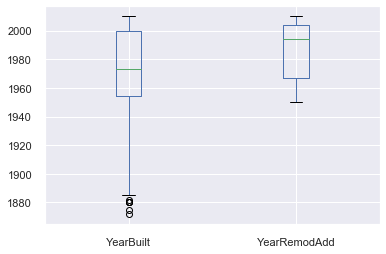

In [69]:
boxplot = house_copy.boxplot(column=['YearBuilt', 'YearRemodAdd'])

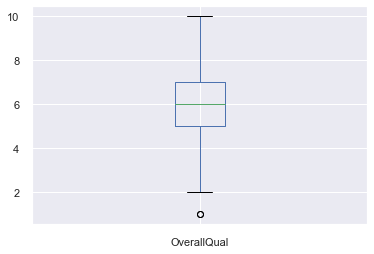

In [70]:
boxplot = house_copy.boxplot(column=['OverallQual'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


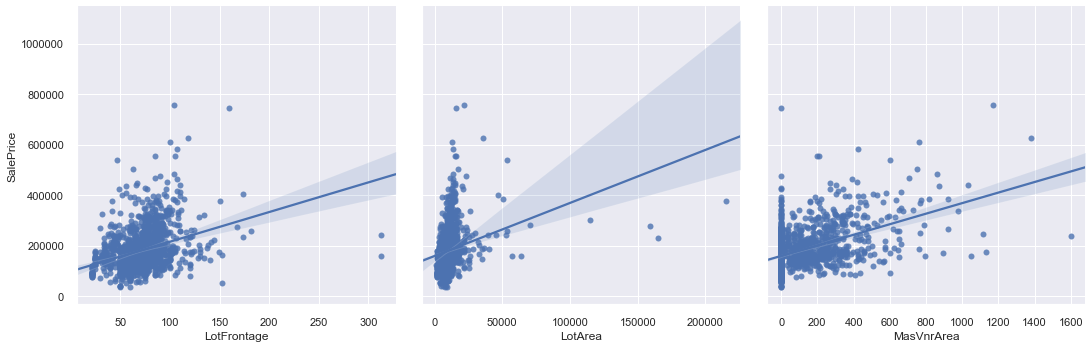

In [71]:
sns.pairplot(house_copy, x_vars=['LotFrontage','LotArea',"MasVnrArea"], y_vars='SalePrice', size=5, aspect=1, kind='reg')

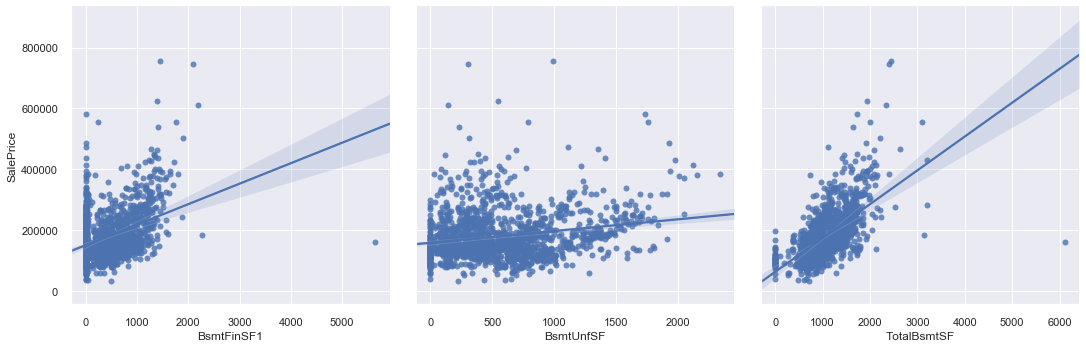

In [72]:
sns.pairplot(house_copy, x_vars=['BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF'], y_vars='SalePrice', size=5, aspect=1, kind='reg')

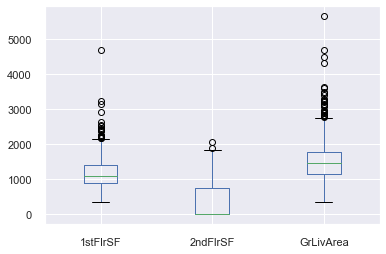

In [73]:
boxplot = house_copy.boxplot(column=['1stFlrSF','2ndFlrSF', 'GrLivArea'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


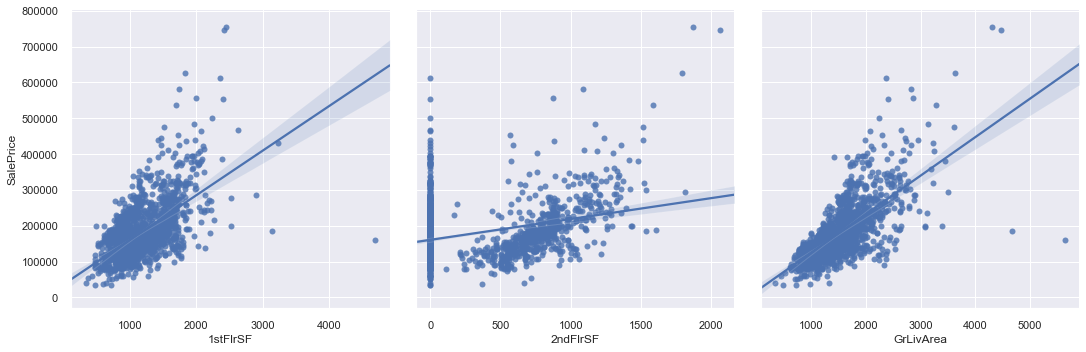

In [74]:
sns.pairplot(house_copy, x_vars=['1stFlrSF','2ndFlrSF', 'GrLivArea'], y_vars='SalePrice', size=5, aspect=1, kind='reg')

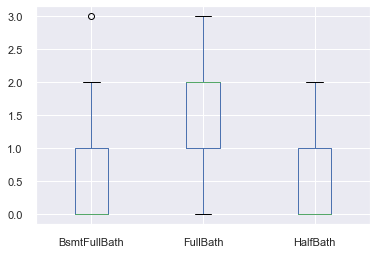

In [75]:
boxplot = house_copy.boxplot(column=['BsmtFullBath', 'FullBath', 'HalfBath'])

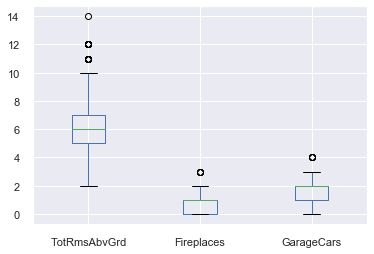

In [76]:
boxplot = house_copy.boxplot(column=['TotRmsAbvGrd', 'Fireplaces', 'GarageCars'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


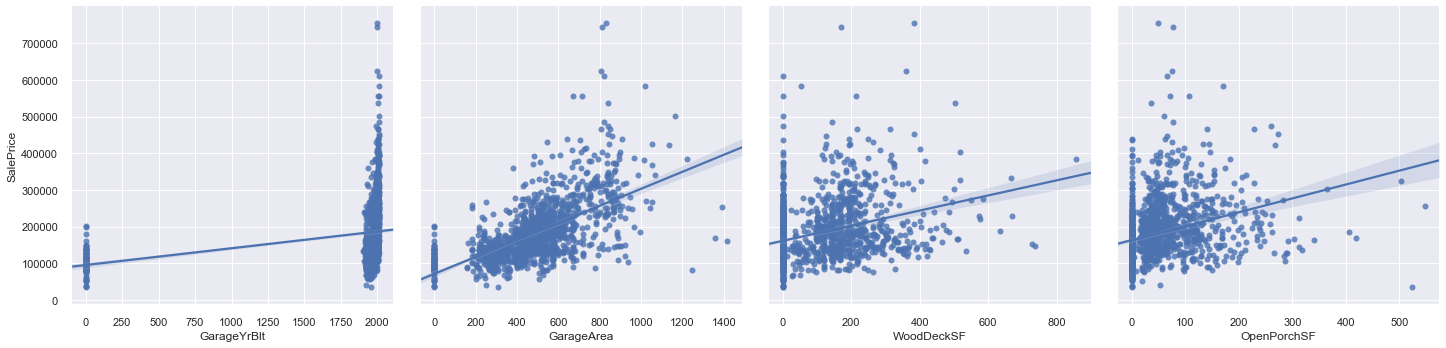

In [77]:
sns.pairplot(house_copy, x_vars=['GarageYrBlt', 'GarageArea','WoodDeckSF', 'OpenPorchSF'], y_vars='SalePrice', size=5, aspect=1, kind='reg')


## 8. Removing Outliers using LOF and Isolation forest <br id=section8></br>

### 8.1 Testing LOF for outlier removal <br id=section801></br>

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import LocalOutlierFactor

In [79]:
len(num_cols)

23

In [80]:
num_cols

Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'SalePrice'],
      dtype='object')

In [81]:
data = house_copy[num_cols].values

In [82]:
X, y = data[:, :-1], data[:, -1]
print(X.shape, y.shape)

(1460, 22) (1460,)


In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [84]:
print(X_train.shape, y_train.shape)

(978, 22) (978,)


In [85]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [86]:
yhat = model.predict(X_test)

In [87]:
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 23835.445


In [88]:
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)

In [89]:
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]

In [90]:
print(X_train.shape, y_train.shape)

(930, 22) (930,)


In [91]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [92]:
yhat = model.predict(X_test)

In [93]:
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 21492.831


In [94]:
house_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 62 columns):
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1460 non-null object
MasVnrArea       1460 non-null float64
ExterQual        1460

### 8.2 Testing Isolation Forest for outlier removal <br id=section802></br>

In [95]:
from sklearn.ensemble import IsolationForest

In [96]:
clf = IsolationForest(max_samples=100, random_state=1, contamination='auto')
preds = clf.fit_predict(house_copy[num_cols])
preds

array([1, 1, 1, ..., 1, 1, 1])

In [97]:
mask = preds != -1
outliers_removed = house_copy[mask]

In [98]:
print(outliers_removed.shape)

(1206, 62)


In [99]:
outliers_removed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1206 entries, 0 to 1459
Data columns (total 62 columns):
MSZoning         1206 non-null object
LotFrontage      1206 non-null float64
LotArea          1206 non-null int64
Street           1206 non-null object
LotShape         1206 non-null object
LandContour      1206 non-null object
Utilities        1206 non-null object
LotConfig        1206 non-null object
LandSlope        1206 non-null object
Neighborhood     1206 non-null object
Condition1       1206 non-null object
Condition2       1206 non-null object
BldgType         1206 non-null object
HouseStyle       1206 non-null object
OverallQual      1206 non-null int64
YearBuilt        1206 non-null int64
YearRemodAdd     1206 non-null int64
RoofStyle        1206 non-null object
RoofMatl         1206 non-null object
Exterior1st      1206 non-null object
Exterior2nd      1206 non-null object
MasVnrType       1206 non-null object
MasVnrArea       1206 non-null float64
ExterQual        1206

In [100]:
data1 = outliers_removed[num_cols].values

In [101]:
X2, y2 = data1[:, :-1], data1[:, -1]
print(X2.shape, y2.shape)

(1206, 22) (1206,)


In [102]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.33, random_state=1)

In [103]:
print(X2_train.shape, y2_train.shape)

(808, 22) (808,)


In [104]:
model = LinearRegression()
model.fit(X2_train, y2_train)

LinearRegression()

In [105]:
yhat = model.predict(X2_test)

In [106]:
mae = mean_absolute_error(y2_test, yhat)
print('MAE: %.3f' % mae)

MAE: 17020.170


### Conclusion : Based on MAE, Isolation forest is better than LOF for outlier removal.

## 9. Encoding all Categorical Columns to calculate correlation matrix<br id=section9></br>

In [107]:
house_copy2=outliers_removed.copy()

In [108]:
cols = house_copy2.columns
num_cols = house_copy2._get_numeric_data().columns
len(num_cols)

23

In [109]:
cat_cols= list(set(cols) - set(num_cols))
len(cat_cols)

39

In [110]:
num_cols

Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'SalePrice'],
      dtype='object')

In [111]:
cat_cols

['PavedDrive',
 'GarageCond',
 'BldgType',
 'Neighborhood',
 'LotShape',
 'GarageFinish',
 'Street',
 'ExterCond',
 'Foundation',
 'Utilities',
 'Exterior2nd',
 'CentralAir',
 'Condition2',
 'RoofMatl',
 'Condition1',
 'BsmtQual',
 'BsmtFinType2',
 'Exterior1st',
 'Heating',
 'SaleCondition',
 'Functional',
 'GarageQual',
 'MasVnrType',
 'LandContour',
 'BsmtFinType1',
 'FireplaceQu',
 'RoofStyle',
 'GarageType',
 'HouseStyle',
 'BsmtCond',
 'SaleType',
 'KitchenQual',
 'MSZoning',
 'LandSlope',
 'BsmtExposure',
 'Electrical',
 'HeatingQC',
 'ExterQual',
 'LotConfig']

In [112]:
#Confirming if Electrical and MasVnrType are encoded
house_copy2[sel_cat_cols].head()

,Electrical,MasVnrType
0,4.0,1.0
1,4.0,2.0
2,4.0,1.0
3,4.0,2.0
4,4.0,1.0


In [113]:
#Removing Electrical,MasVnrType from categorical columns since they are already encoded, also removing GarageYrBlt since it does not need to be encoded and shoud not be a ctegorical column)
#cat_cols=[col for col in cat_cols if col not in ("Electrical","MasVnrType")]

In [114]:
len(cat_cols)

39

In [115]:
from sklearn.preprocessing import LabelEncoder                                    # Label encoder is used to transform non-numerical labels to numerical labels.
number = LabelEncoder()
for i in cat_cols:
    house_copy2[i] = number.fit_transform(house_copy2[i].astype('str'))

In [116]:
house_copy2.head()

,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,SaleType,SaleCondition,SalePrice
0,3,65.0,8450,1,3,3,0,4,0,5,2,2,0,5,7,2003,2003,1,0,11,13,1,196.0,2,3,2,2,4,4,2,706,6,150,856,1,0,1,4,856,854,1710,1,2,1,2,8,6,0,3,1,2003,2,2,548,5,5,2,0,61,8,4,208500
1,3,80.0,9600,1,3,3,0,2,0,24,1,2,0,2,6,1976,1976,1,0,7,8,3,0.0,3,3,1,2,4,1,0,978,6,284,1262,1,0,1,4,1262,0,1262,0,2,0,3,6,6,1,5,1,1976,2,2,460,5,5,2,298,0,8,4,181500
2,3,68.0,11250,1,0,3,0,4,0,5,2,2,0,5,7,2001,2002,1,0,11,13,1,162.0,2,3,2,2,4,2,2,486,6,434,920,1,0,1,4,920,866,1786,1,2,1,2,6,6,1,5,1,2001,2,2,608,5,5,2,0,42,8,4,223500
3,3,60.0,9550,1,0,3,0,0,0,6,2,2,0,5,7,1915,1970,1,0,12,15,3,0.0,3,3,0,4,1,4,0,216,6,540,756,1,2,1,4,961,756,1717,1,1,0,2,7,6,1,2,5,1998,3,3,642,5,5,2,0,35,8,0,140000
4,3,84.0,14260,1,0,3,0,2,0,15,2,2,0,5,8,2000,2000,1,0,11,13,1,350.0,2,3,2,2,4,0,2,655,6,490,1145,1,0,1,4,1145,1053,2198,1,2,1,2,9,6,1,5,1,2000,2,3,836,5,5,2,192,84,8,4,250000


In [117]:
corr_matrix1=house_copy2.corr().abs()
corr_matrix1['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.777099
GrLivArea        0.663232
YearBuilt        0.603858
ExterQual        0.603023
GarageCars       0.599174
FullBath         0.572070
GarageArea       0.570261
YearRemodAdd     0.559132
TotalBsmtSF      0.558280
BsmtQual         0.545050
KitchenQual      0.525193
1stFlrSF         0.515078
GarageFinish     0.482633
GarageType       0.451785
Foundation       0.440158
HeatingQC        0.439547
TotRmsAbvGrd     0.434430
Fireplaces       0.385644
BsmtFinSF1       0.325653
OpenPorchSF      0.325025
MasVnrArea       0.291451
LotShape         0.262328
CentralAir       0.257505
Electrical       0.255301
LotArea          0.251773
LotFrontage      0.246135
BsmtExposure     0.246097
2ndFlrSF         0.245777
HalfBath         0.244176
MSZoning         0.242149
WoodDeckSF       0.237765
BsmtFullBath     0.228253
PavedDrive       0.209723
GarageYrBlt      0.207880
HouseStyle       0.194972
SaleCondition    0.193938
GarageCond       0.182243
BsmtUnfSF   

In [118]:
# Checking for correlation between independent variables : "Mutlticolinearlity"
high_corr_var=np.where(corr_matrix1>0.6)
high_corr_var=[(corr_matrix1.columns[x],corr_matrix1.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]
high_corr_var

[('OverallQual', 'ExterQual'),
 ('OverallQual', 'SalePrice'),
 ('YearBuilt', 'YearRemodAdd'),
 ('YearBuilt', 'Foundation'),
 ('YearBuilt', 'SalePrice'),
 ('Exterior1st', 'Exterior2nd'),
 ('ExterQual', 'SalePrice'),
 ('BsmtFinType1', 'BsmtFinSF1'),
 ('BsmtFinSF1', 'BsmtFullBath'),
 ('TotalBsmtSF', '1stFlrSF'),
 ('2ndFlrSF', 'GrLivArea'),
 ('2ndFlrSF', 'HalfBath'),
 ('GrLivArea', 'TotRmsAbvGrd'),
 ('GrLivArea', 'SalePrice'),
 ('GarageCars', 'GarageArea')]

## 10. Feature Engineering and Removing  Multicolinearlity<br id=section10></br>

In [119]:
house_copy3=outliers_removed.copy()

In [120]:
house_copy3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1206 entries, 0 to 1459
Data columns (total 62 columns):
MSZoning         1206 non-null object
LotFrontage      1206 non-null float64
LotArea          1206 non-null int64
Street           1206 non-null object
LotShape         1206 non-null object
LandContour      1206 non-null object
Utilities        1206 non-null object
LotConfig        1206 non-null object
LandSlope        1206 non-null object
Neighborhood     1206 non-null object
Condition1       1206 non-null object
Condition2       1206 non-null object
BldgType         1206 non-null object
HouseStyle       1206 non-null object
OverallQual      1206 non-null int64
YearBuilt        1206 non-null int64
YearRemodAdd     1206 non-null int64
RoofStyle        1206 non-null object
RoofMatl         1206 non-null object
Exterior1st      1206 non-null object
Exterior2nd      1206 non-null object
MasVnrType       1206 non-null object
MasVnrArea       1206 non-null float64
ExterQual        1206

Text(0.5, 1, 'Correlation between features')

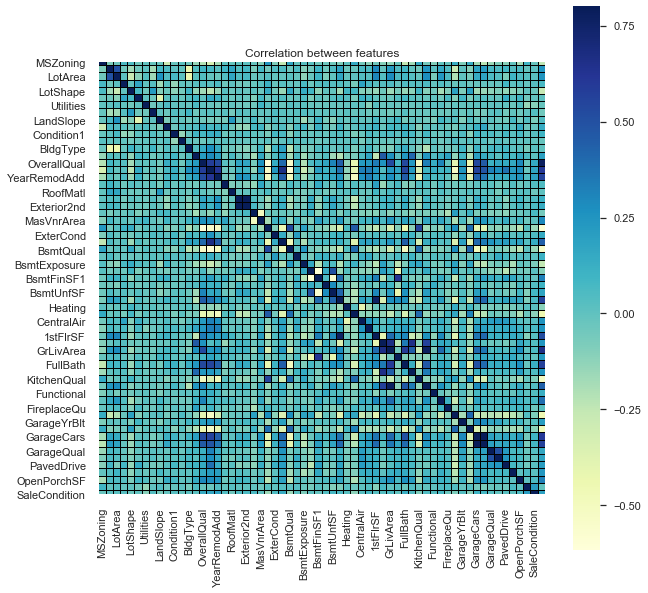

In [121]:
corr = house_copy2.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = False,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')

In [122]:
high_corr_var=np.where(corr_matrix1>0.6)
high_corr_var=[(corr_matrix1.columns[x],corr_matrix1.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]
high_corr_var

[('OverallQual', 'ExterQual'),
 ('OverallQual', 'SalePrice'),
 ('YearBuilt', 'YearRemodAdd'),
 ('YearBuilt', 'Foundation'),
 ('YearBuilt', 'SalePrice'),
 ('Exterior1st', 'Exterior2nd'),
 ('ExterQual', 'SalePrice'),
 ('BsmtFinType1', 'BsmtFinSF1'),
 ('BsmtFinSF1', 'BsmtFullBath'),
 ('TotalBsmtSF', '1stFlrSF'),
 ('2ndFlrSF', 'GrLivArea'),
 ('2ndFlrSF', 'HalfBath'),
 ('GrLivArea', 'TotRmsAbvGrd'),
 ('GrLivArea', 'SalePrice'),
 ('GarageCars', 'GarageArea')]

In [123]:
house_copy3['Lot_comb'] = house_copy3[['LotFrontage','LotArea','LotShape', 'LotConfig']].astype("str").agg('-'.join, axis=1)

In [124]:
#house_copy3["Year_comb"]=house_copy3[['YearBuilt','YearRemodAdd',"Foundation"]].astype("str").agg('-'.join, axis=1)

In [125]:
house_copy3["LivArea_comb"]=house_copy3[['GrLivArea','TotRmsAbvGrd']].astype("str").agg('-'.join, axis=1)

In [126]:
house_copy3["Garage_comb1"]=house_copy3[['GarageCars','GarageArea']].astype("str").agg('-'.join, axis=1)

In [127]:
house_copy3["Garage_comb2"]=house_copy3[['GarageType','GarageFinish',"GarageYrBlt","GarageQual","GarageCond"]].astype("str").agg('-'.join, axis=1)

In [128]:
house_copy3["SF_Comb"]=house_copy3[['1stFlrSF','2ndFlrSF',"TotalBsmtSF"]].astype("str").agg('-'.join, axis=1)

In [129]:
house_copy3["MasVnr_Comb"]=house_copy3[['MasVnrType','MasVnrArea']].astype("str").agg('-'.join, axis=1)

In [130]:
house_copy3["Exterior_Comb"]=house_copy3[['Exterior1st','Exterior2nd']].astype("str").agg('-'.join, axis=1)

In [131]:
house_copy3["Bsmt_Comb1"]=house_copy3[['BsmtFinType1','BsmtFinSF1','BsmtUnfSF','BsmtFullBath',"BsmtFinType2"]].astype("str").agg('-'.join, axis=1)

In [132]:
house_copy3["Bsmt_Comb2"]=house_copy3[['BsmtQual','BsmtCond',"BsmtExposure"]].astype("str").agg('-'.join, axis=1)

In [133]:
#house_copy3["Bath_comb"]= house_copy3[['FullBath','HalfBath']].astype("str").agg('-'.join, axis=1)

In [134]:
house_copy3.drop(['LotFrontage','LotArea','LotShape', 'LotConfig',"Foundation",'GrLivArea','TotRmsAbvGrd','GarageCars','GarageArea','GarageType','GarageFinish',"GarageYrBlt","GarageQual","GarageCond",'1stFlrSF','2ndFlrSF',"TotalBsmtSF",'MasVnrType','MasVnrArea','Exterior1st','Exterior2nd','BsmtFinType1','BsmtFinSF1',"BsmtFinType2",'BsmtUnfSF','BsmtFullBath','BsmtQual','BsmtCond',"BsmtExposure"],axis=1, inplace=True)

In [135]:
#house_copy3.info()
to_encode=["Lot_comb","LivArea_comb","Garage_comb1","Garage_comb2","SF_Comb","MasVnr_Comb","Exterior_Comb","Bsmt_Comb1","Bsmt_Comb2"]#"Bath_comb",Year_comb]

In [136]:
#Encoding new features
for i in to_encode:
    house_copy3[i] = number.fit_transform(house_copy3[i].astype('str'))

In [137]:
house_copy3["Fireplace_Comb"]=house_copy3[['Fireplaces','FireplaceQu']].astype("str").agg('-'.join, axis=1)

In [138]:
house_copy3["Roof_Comb"]=house_copy3[['RoofStyle','RoofMatl']].astype("str").agg('-'.join, axis=1)

In [139]:
house_copy3["Heating_Comb"]=house_copy3[['Heating','HeatingQC']].astype("str").agg('-'.join, axis=1)

In [140]:
house_copy3["Land_Comb"]=house_copy3[['LandContour','LandSlope',"Street"]].astype("str").agg('-'.join, axis=1)

In [141]:
house_copy3["neighborhood_Comb"]=house_copy3[['Neighborhood','Condition1',"Condition2"]].astype("str").agg('-'.join, axis=1)

In [142]:
house_copy3["house_Comb"]=house_copy3[['BldgType','HouseStyle']].astype("str").agg('-'.join, axis=1)

In [143]:
house_copy3.drop(['Heating','HeatingQC','RoofStyle','RoofMatl','Fireplaces','FireplaceQu','LandContour','LandSlope',"Street",'Neighborhood','Condition1',"Condition2",'BldgType','HouseStyle'],axis=1, inplace=True) #OverallQual','ExterQual'

In [144]:
to_encode2=["Fireplace_Comb","Roof_Comb","Heating_Comb","Land_Comb","house_Comb","neighborhood_Comb"]

In [145]:
for i in to_encode2:
    house_copy3[i] = number.fit_transform(house_copy3[i].astype('str'))

In [146]:
house_copy3.head()

,MSZoning,Utilities,OverallQual,YearBuilt,YearRemodAdd,ExterQual,ExterCond,CentralAir,Electrical,FullBath,HalfBath,KitchenQual,Functional,PavedDrive,WoodDeckSF,OpenPorchSF,SaleType,SaleCondition,SalePrice,Lot_comb,LivArea_comb,Garage_comb1,Garage_comb2,SF_Comb,MasVnr_Comb,Exterior_Comb,Bsmt_Comb1,Bsmt_Comb2,Fireplace_Comb,Roof_Comb,Heating_Comb,Land_Comb,neighborhood_Comb,house_Comb
0,RL,AllPub,7,2003,2003,Gd,TA,Y,4.0,2,1,Gd,Typ,Y,0,61,WD,Normal,208500,411,560,243,105,834,82,39,557,20,0,4,1,10,13,5
1,RL,AllPub,6,1976,1976,TA,TA,Y,4.0,2,0,TA,Typ,Y,298,0,WD,Normal,181500,850,196,175,79,298,246,24,187,18,5,4,1,10,66,2
2,RL,AllPub,7,2001,2002,Gd,TA,Y,4.0,2,1,Gd,Typ,Y,0,42,WD,Normal,223500,448,610,282,103,923,62,39,477,19,5,4,1,10,13,5
3,RL,AllPub,7,1915,1970,TA,TA,Y,4.0,1,0,Gd,Typ,Y,0,35,WD,Abnorml,140000,343,567,352,389,984,246,50,26,28,3,4,3,10,15,5
4,RL,AllPub,8,2000,2000,Gd,TA,Y,4.0,2,1,Gd,Typ,Y,192,84,WD,Normal,250000,887,768,392,102,187,164,39,529,17,5,4,1,10,43,5


In [147]:
cols3 = house_copy3.columns
num_cols2 = house_copy3._get_numeric_data().columns
len(num_cols2)

23

In [148]:
num_cols2

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'FullBath', 'HalfBath',
       'WoodDeckSF', 'OpenPorchSF', 'SalePrice', 'Lot_comb', 'LivArea_comb',
       'Garage_comb1', 'Garage_comb2', 'SF_Comb', 'MasVnr_Comb',
       'Exterior_Comb', 'Bsmt_Comb1', 'Bsmt_Comb2', 'Fireplace_Comb',
       'Roof_Comb', 'Heating_Comb', 'Land_Comb', 'neighborhood_Comb',
       'house_Comb'],
      dtype='object')

In [149]:
cat_cols2= list(set(cols3) - set(num_cols2))
len(cat_cols2)

11

In [150]:
cat_cols2

['MSZoning',
 'CentralAir',
 'PavedDrive',
 'Electrical',
 'ExterCond',
 'SaleCondition',
 'ExterQual',
 'Functional',
 'SaleType',
 'KitchenQual',
 'Utilities']

In [151]:
for i in cat_cols2:
    house_copy3[i] = number.fit_transform(house_copy3[i].astype('str'))

In [152]:
house_copy3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1206 entries, 0 to 1459
Data columns (total 34 columns):
MSZoning             1206 non-null int32
Utilities            1206 non-null int32
OverallQual          1206 non-null int64
YearBuilt            1206 non-null int64
YearRemodAdd         1206 non-null int64
ExterQual            1206 non-null int32
ExterCond            1206 non-null int32
CentralAir           1206 non-null int32
Electrical           1206 non-null int32
FullBath             1206 non-null int64
HalfBath             1206 non-null int64
KitchenQual          1206 non-null int32
Functional           1206 non-null int32
PavedDrive           1206 non-null int32
WoodDeckSF           1206 non-null int64
OpenPorchSF          1206 non-null int64
SaleType             1206 non-null int32
SaleCondition        1206 non-null int32
SalePrice            1206 non-null int64
Lot_comb             1206 non-null int32
LivArea_comb         1206 non-null int32
Garage_comb1         1206 non-nu

In [153]:
house_copy3.head()

,MSZoning,Utilities,OverallQual,YearBuilt,YearRemodAdd,ExterQual,ExterCond,CentralAir,Electrical,FullBath,HalfBath,KitchenQual,Functional,PavedDrive,WoodDeckSF,OpenPorchSF,SaleType,SaleCondition,SalePrice,Lot_comb,LivArea_comb,Garage_comb1,Garage_comb2,SF_Comb,MasVnr_Comb,Exterior_Comb,Bsmt_Comb1,Bsmt_Comb2,Fireplace_Comb,Roof_Comb,Heating_Comb,Land_Comb,neighborhood_Comb,house_Comb
0,3,0,7,2003,2003,2,3,1,4,2,1,2,6,2,0,61,8,4,208500,411,560,243,105,834,82,39,557,20,0,4,1,10,13,5
1,3,0,6,1976,1976,3,3,1,4,2,0,3,6,2,298,0,8,4,181500,850,196,175,79,298,246,24,187,18,5,4,1,10,66,2
2,3,0,7,2001,2002,2,3,1,4,2,1,2,6,2,0,42,8,4,223500,448,610,282,103,923,62,39,477,19,5,4,1,10,13,5
3,3,0,7,1915,1970,3,3,1,4,1,0,2,6,2,0,35,8,0,140000,343,567,352,389,984,246,50,26,28,3,4,3,10,15,5
4,3,0,8,2000,2000,2,3,1,4,2,1,2,6,2,192,84,8,4,250000,887,768,392,102,187,164,39,529,17,5,4,1,10,43,5


In [154]:
corr_matrix2=house_copy3.corr().abs()
corr_matrix2['SalePrice'].sort_values(ascending=False)

SalePrice            1.000000
OverallQual          0.777099
YearBuilt            0.603858
ExterQual            0.603023
Garage_comb1         0.597439
FullBath             0.572070
YearRemodAdd         0.559132
KitchenQual          0.525193
Bsmt_Comb2           0.509092
Garage_comb2         0.470985
Heating_Comb         0.440714
Fireplace_Comb       0.362940
OpenPorchSF          0.325025
CentralAir           0.257505
Electrical           0.255301
HalfBath             0.244176
MSZoning             0.242149
WoodDeckSF           0.237765
Lot_comb             0.228765
PavedDrive           0.209723
SaleCondition        0.193938
LivArea_comb         0.165764
neighborhood_Comb    0.151793
ExterCond            0.145601
SF_Comb              0.131550
Functional           0.130038
Bsmt_Comb1           0.090198
Exterior_Comb        0.070708
MasVnr_Comb          0.054030
Roof_Comb            0.048728
house_Comb           0.045603
Utilities            0.017358
Land_Comb            0.016878
SaleType  

In [155]:
high_corr_var=np.where(corr_matrix2>0.6)
high_corr_var=[(corr_matrix2.columns[x],corr_matrix2.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]
high_corr_var

[('OverallQual', 'ExterQual'),
 ('OverallQual', 'SalePrice'),
 ('YearBuilt', 'YearRemodAdd'),
 ('YearBuilt', 'SalePrice'),
 ('ExterQual', 'SalePrice')]

### Conclusion: The number of features that have a correlation value greater than 0.6 (Multicolinearlity) is significantly reduced after combining features

In [156]:
#house_copy3["Qual_Comb"]=house_copy3[['OverallQual','ExterQual']].astype("str").agg('-'.join, axis=1)

## 11.  Linear Regression Models <br id=section11></br>

### 11.1 Models using dataset without Feature Engineering <br id=section1101></br>

### 11.1.1 Model 1 <br id=section110101></br>

In [157]:
features=[col for col in house_copy2.columns]
features.remove("SalePrice")
target=["SalePrice"]

In [158]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(house_copy2[features], house_copy2[target], test_size=0.33, random_state=5)

In [159]:
from sklearn.linear_model import LinearRegression
lr_model1 = LinearRegression()

In [160]:
lr_model1.fit(X_train1, y_train1)

LinearRegression()

In [161]:
y_pred_train1 = lr_model1.predict(X_train1)
y_pred_test1 = lr_model1.predict(X_test1)

In [162]:
mae = mean_absolute_error(y_test1, y_pred_test1)
print('MAE: %.3f' % mae)

MAE: 14549.518


In [163]:
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train1, y_pred_train1)).round(3)
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test1, y_pred_test1)).round(3)

In [164]:
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 18995.157
RMSE for test set is 20865.723


In [165]:
RMSE_test/house_copy2['SalePrice'].mean()

0.12282248008989975

In [166]:
# r2_score is a standard metric in the sklearn library
r2_train = metrics.r2_score(y_train1, y_pred_train1)
r2_test = metrics.r2_score(y_test1, y_pred_test1)
print('R-Squared of train data:',r2_train)
print('R-Squared of test data:',r2_test)

R-Squared of train data: 0.8767393324381061
R-Squared of test data: 0.8444966248516338


### 11.1.2 Testing Model1 for heteroscedasticity <br id=section110102></br>

In [167]:
X = house_copy2[features]
y= house_copy2.SalePrice

In [168]:
lr_model1.fit (X,y)

LinearRegression()

In [169]:
y_pred = lr_model1.predict(X)

In [170]:
house_copy2['predictions'] = y_pred

In [171]:
house_copy2['error'] = house_copy2['SalePrice'] - house_copy2['predictions']

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


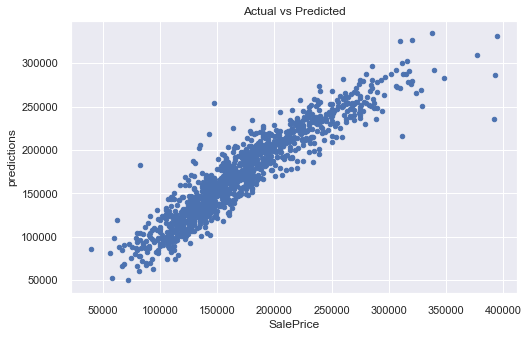

In [172]:
house_copy2.plot.scatter(x='SalePrice', y='predictions',\
                      figsize=(8,5), grid=True, title='Actual vs Predicted')

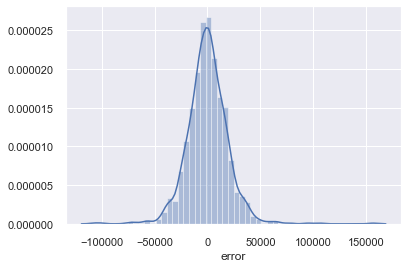

In [173]:
sns.distplot(house_copy2['error'])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


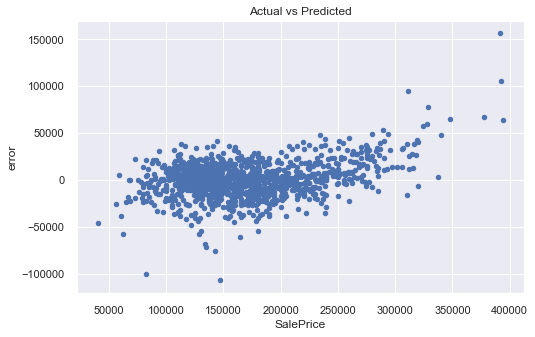

In [174]:
house_copy2.plot.scatter(x='SalePrice', y='error',\
                      figsize=(8,5), grid=True, title='Actual vs Predicted')

### 11.1.3 Standardising Data <br id=section110103></br>

In [175]:
house_copy2.drop(["predictions","error"], axis=1,inplace=True)

In [176]:
house_copy2.head()

,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,SaleType,SaleCondition,SalePrice
0,3,65.0,8450,1,3,3,0,4,0,5,2,2,0,5,7,2003,2003,1,0,11,13,1,196.0,2,3,2,2,4,4,2,706,6,150,856,1,0,1,4,856,854,1710,1,2,1,2,8,6,0,3,1,2003,2,2,548,5,5,2,0,61,8,4,208500
1,3,80.0,9600,1,3,3,0,2,0,24,1,2,0,2,6,1976,1976,1,0,7,8,3,0.0,3,3,1,2,4,1,0,978,6,284,1262,1,0,1,4,1262,0,1262,0,2,0,3,6,6,1,5,1,1976,2,2,460,5,5,2,298,0,8,4,181500
2,3,68.0,11250,1,0,3,0,4,0,5,2,2,0,5,7,2001,2002,1,0,11,13,1,162.0,2,3,2,2,4,2,2,486,6,434,920,1,0,1,4,920,866,1786,1,2,1,2,6,6,1,5,1,2001,2,2,608,5,5,2,0,42,8,4,223500
3,3,60.0,9550,1,0,3,0,0,0,6,2,2,0,5,7,1915,1970,1,0,12,15,3,0.0,3,3,0,4,1,4,0,216,6,540,756,1,2,1,4,961,756,1717,1,1,0,2,7,6,1,2,5,1998,3,3,642,5,5,2,0,35,8,0,140000
4,3,84.0,14260,1,0,3,0,2,0,15,2,2,0,5,8,2000,2000,1,0,11,13,1,350.0,2,3,2,2,4,0,2,655,6,490,1145,1,0,1,4,1145,1053,2198,1,2,1,2,9,6,1,5,1,2000,2,3,836,5,5,2,192,84,8,4,250000


In [177]:
features=[col for col in house_copy2.columns]
#features.remove("SalePrice")
#target=["SalePrice"]

In [178]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(house_copy2) 
house_copy2_st= scaler.transform(house_copy2)
house_copy2_st = pd.DataFrame(house_copy2_st)
house_copy2_st.columns=features
house_copy2_st.head()
#scaler = StandardScaler()
#X_train2 = scaler.fit_transform(X_train2)
#X_test2 = scaler.transform(X_test2)

,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,SaleType,SaleCondition,SalePrice
0,-0.023567,-0.224588,-0.266602,0.040757,0.741952,0.293582,-0.028808,0.598698,-0.209226,-1.174777,-0.053356,-0.015517,-0.407086,1.045017,0.831839,1.077887,0.892924,-0.458431,-0.099521,0.757463,0.754378,-1.384639,0.791225,-1.088545,0.337319,0.853648,-0.691479,0.311178,0.633118,-0.493812,0.731094,0.349193,-0.962904,-0.453647,-0.102871,-0.886123,0.224772,0.298897,-0.829321,1.382197,0.711595,1.198765,0.920769,1.291989,-0.618866,1.290954,0.255125,-0.943474,-0.125364,-0.723833,0.341949,-0.012107,0.371339,0.464069,0.222976,0.196276,0.250549,-0.754097,0.356720,0.291342,0.208122,0.718454
1,-0.023567,0.528799,0.016638,0.040757,0.741952,0.293582,-0.028808,-0.648331,-0.209226,1.965911,-1.202417,-0.015517,-0.407086,-0.521859,-0.021220,0.128955,-0.423241,-0.458431,-0.099521,-0.541045,-0.685603,0.549205,-0.578328,0.687890,0.337319,-0.552772,-0.691479,0.311178,-1.318006,-1.376743,1.422767,0.349193,-0.641061,0.674356,-0.102871,-0.886123,0.224772,0.298897,0.444434,-0.783668,-0.436065,-0.806381,0.920769,-0.742134,0.808193,-0.217661,0.255125,0.712755,1.642933,-0.723833,0.020930,-0.012107,0.371339,-0.080072,0.222976,0.196276,0.250549,1.932342,-0.721663,0.291342,0.208122,0.216101
2,-0.023567,-0.073911,0.423026,0.040757,-1.391898,0.293582,-0.028808,0.598698,-0.209226,-1.174777,-0.053356,-0.015517,-0.407086,1.045017,0.831839,1.007596,0.844177,-0.458431,-0.099521,0.757463,0.754378,-1.384639,0.553649,-1.088545,0.337319,0.853648,-0.691479,0.311178,-0.667632,-0.493812,0.171653,0.349193,-0.280789,-0.275834,-0.102871,-0.886123,0.224772,0.298897,-0.628532,1.412631,0.906287,1.198765,0.920769,1.291989,-0.618866,-0.217661,0.255125,0.712755,1.642933,-0.723833,0.318170,-0.012107,0.371339,0.835074,0.222976,0.196276,0.250549,-0.754097,0.020830,0.291342,0.208122,0.997539
3,-0.023567,-0.475717,0.004323,0.040757,-1.391898,0.293582,-0.028808,-1.895360,-0.209226,-1.009478,-0.053356,-0.015517,-0.407086,1.045017,0.831839,-2.014930,-0.715722,-0.458431,-0.099521,1.082090,1.330371,0.549205,-0.578328,0.687890,0.337319,-1.959192,1.003487,-2.971164,0.633118,-1.376743,-0.514934,0.349193,-0.026197,-0.731480,-0.102871,0.267319,0.224772,0.298897,-0.499902,1.133655,0.729527,1.198765,-1.037692,-0.742134,-0.618866,0.536647,0.255125,0.712755,-1.009513,1.479176,0.282501,0.846801,2.100430,1.045310,0.222976,0.196276,0.250549,-0.754097,-0.102919,0.291342,-3.594837,-0.556034
4,-0.023567,0.729702,1.164375,0.040757,-1.391898,0.293582,-0.028808,-0.648331,-0.209226,0.478217,-0.053356,-0.015517,-0.407086,1.045017,1.684898,0.972450,0.746684,-0.458431,-0.099521,0.757463,0.754378,-1.384639,1.867302,-1.088545,0.337319,0.853648,-0.691479,0.311178,-1.968381,-0.493812,0.601405,0.349193,-0.146288,0.349291,-0.102871,-0.886123,0.224772,0.298897,0.077367,1.886890,1.961724,1.198765,0.920769,1.291989,-0.618866,2.045262,0.255125,0.712755,1.642933,-0.723833,0.306281,-0.012107,2.100430,2.244893,0.222976,0.196276,0.250549,0.976763,0.763323,0.291342,0.208122,1.490589


### 11.1.4 Model 2 : Building second model with standardised dataset <br id=section110104></br> 

In [179]:
features=[col for col in house_copy2_st.columns]

In [180]:
features.remove("SalePrice")
target=["SalePrice"]

In [181]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(house_copy2_st[features], house_copy2_st[target], test_size=0.33, random_state=5)

In [182]:
lr_model1_st = LinearRegression()

In [183]:
lr_model1_st.fit(X_train2, y_train2)

LinearRegression()

In [184]:
y_pred_train2 = lr_model1_st.predict(X_train2)

In [185]:
y_pred_test2 = lr_model1_st.predict(X_test2)

In [186]:
RMSE_train = np.sqrt(metrics.mean_squared_error(y_train2, y_pred_train2)).round(3)
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test2, y_pred_test2)).round(3)

In [187]:
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 0.353
RMSE for test set is 0.388


In [188]:
#r2_score is a standard metric in the sklearn library
r2_train = metrics.r2_score(y_train2, y_pred_train2)
r2_test = metrics.r2_score(y_test2, y_pred_test2)
print('R-Squared of train data:',r2_train)
print('R-Squared of test data:',r2_test)

R-Squared of train data: 0.8767393324381061
R-Squared of test data: 0.8444966248516483


### Conclusion:  Standardising data does not improve R2 value of the model

### 11.1.5 Testing Model 2 for heteroscedasticity <br id=section1105></br>

In [189]:
X = house_copy2_st[features]
y= house_copy2_st.SalePrice

In [190]:
lr_model1_st.fit (X,y)

LinearRegression()

In [191]:
y_pred = lr_model1_st.predict(X)

In [192]:
house_copy2_st['predictions'] = y_pred

In [193]:
house_copy2_st['error'] = house_copy2_st['SalePrice'] - house_copy2_st['predictions']

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


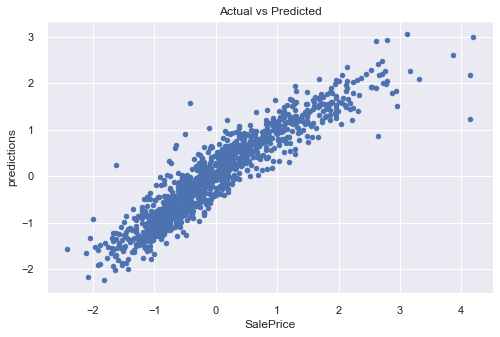

In [194]:
house_copy2_st.plot.scatter(x='SalePrice', y='predictions',\
                      figsize=(8,5), grid=True, title='Actual vs Predicted')

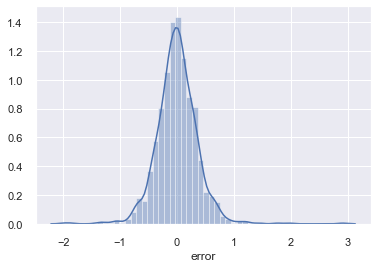

In [195]:
sns.distplot(house_copy2_st['error'])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


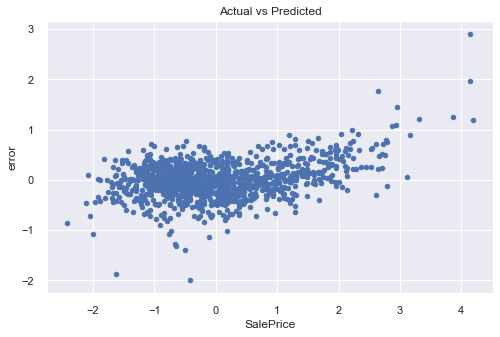

In [196]:
house_copy2_st.plot.scatter(x='SalePrice', y='error',\
                      figsize=(8,5), grid=True, title='Actual vs Predicted')

### Conclusion: There is no increase or decrease in heteroscedasticity of the model after standardisation

### 11.2 Building model with Engineered Features <br id=section1102></br>

### 11.2.1  Model 3 <br id=section110201></br>

In [197]:
features=[col for col in house_copy3.columns]
features.remove("SalePrice")
target=["SalePrice"]

In [198]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(house_copy3[features], house_copy3[target], test_size=0.33, random_state=5)

In [199]:
from sklearn.linear_model import LinearRegression
lr_model2 = LinearRegression()

In [200]:
lr_model2.fit(X_train2, y_train2)

LinearRegression()

In [201]:
y_pred_train2 = lr_model2.predict(X_train2)

In [202]:
y_pred_test2 = lr_model2.predict(X_test2)

In [203]:
mae = mean_absolute_error(y_test2, y_pred_test2)
print('MAE: %.3f' % mae)

MAE: 17915.933


In [204]:
RMSE_train = np.sqrt(metrics.mean_squared_error(y_train2, y_pred_train2)).round(3)
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test2, y_pred_test2)).round(3)

In [205]:
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 23819.657
RMSE for test set is 24825.801


In [206]:
RMSE_test/house_copy3['SalePrice'].mean()

0.14613279631088333

In [207]:
#r2_score is a standard metric in the sklearn library
r2_train = metrics.r2_score(y_train2, y_pred_train2)
r2_test = metrics.r2_score(y_test2, y_pred_test2)
print('R-Squared of train data:',r2_train)
print('R-Squared of test data:',r2_test)

R-Squared of train data: 0.8061750253248989
R-Squared of test data: 0.7798698747262611


### Conclusion: Engineering Features does not help in improving the Model.  Both RMSE and R2 for Model 2 is better than Model 3

### 11.2.2 Testing Model 3 for heteroscedasticity <br id=section110202></br>

In [208]:
X = house_copy3[features]
y= house_copy3.SalePrice

In [209]:
lr_model2.fit (X,y)

LinearRegression()

In [210]:
y_pred = lr_model2.predict(X)

In [211]:
house_copy3['predictions'] = y_pred

In [212]:
house_copy3['error'] = house_copy3['SalePrice'] - house_copy3['predictions']

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


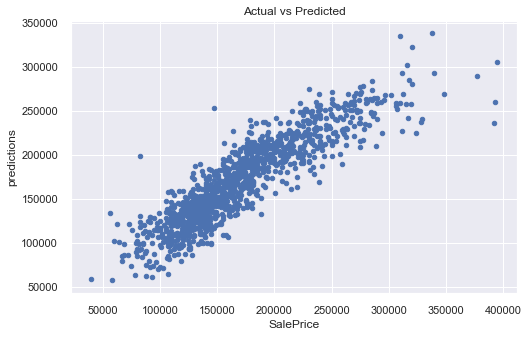

In [213]:
house_copy3.plot.scatter(x='SalePrice', y='predictions',\
                      figsize=(8,5), grid=True, title='Actual vs Predicted')

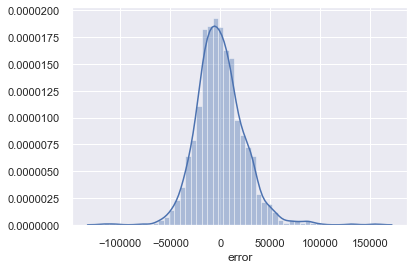

In [214]:
sns.distplot(house_copy3['error'])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


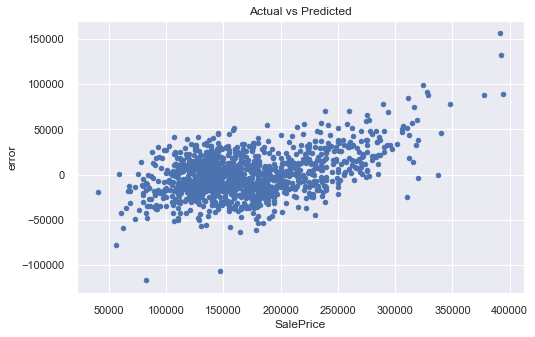

In [215]:
house_copy3.plot.scatter(x='SalePrice', y='error',\
                      figsize=(8,5), grid=True, title='Actual vs Predicted')

### Conclusion: Heteroscedasticity of the model increases on combining features

### 11.2.3  Standardising data with engineered features <br id=section110203></br>

In [216]:
house_copy4=house_copy3.copy()

In [217]:
house_copy4.drop(["predictions","error"],axis=1,inplace=True)

In [218]:
features =[col for col in house_copy4.columns]

In [219]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(house_copy4) 
house_copy4_st= scaler.transform(house_copy4)
house_copy4_st = pd.DataFrame(house_copy4_st)
house_copy4_st.columns=features
house_copy4_st.head()

#scaler = StandardScaler()
#X_train3 = scaler.fit_transform(X_train3)
#X_test3 =scaler.transform(X_test3)

,MSZoning,Utilities,OverallQual,YearBuilt,YearRemodAdd,ExterQual,ExterCond,CentralAir,Electrical,FullBath,HalfBath,KitchenQual,Functional,PavedDrive,WoodDeckSF,OpenPorchSF,SaleType,SaleCondition,SalePrice,Lot_comb,LivArea_comb,Garage_comb1,Garage_comb2,SF_Comb,MasVnr_Comb,Exterior_Comb,Bsmt_Comb1,Bsmt_Comb2,Fireplace_Comb,Roof_Comb,Heating_Comb,Land_Comb,neighborhood_Comb,house_Comb
0,-0.023567,-0.028808,0.831839,1.077887,0.892924,-1.088545,0.337319,0.224772,0.298897,0.920769,1.291989,-0.618866,0.255125,0.250549,-0.754097,0.356720,0.291342,0.208122,0.718454,-0.283143,0.366774,0.613172,-0.556364,1.022821,-1.715665,0.613340,-0.062421,-0.458282,-0.905325,-0.471118,-0.840448,0.275609,-1.154679,-0.077148
1,-0.023567,-0.028808,-0.021220,0.128955,-0.423241,0.687890,0.337319,0.224772,0.298897,0.920769,-0.742134,0.808193,0.255125,0.250549,1.932342,-0.721663,0.291342,0.208122,0.216101,1.244137,-0.965765,-0.019026,-0.774371,-0.753857,0.502113,-0.548474,-1.217975,-0.713094,1.191913,-0.471118,-0.840448,0.275609,1.820001,-0.555093
2,-0.023567,-0.028808,0.831839,1.007596,0.844177,-1.088545,0.337319,0.224772,0.298897,0.920769,1.291989,-0.618866,0.255125,0.250549,-0.754097,0.020830,0.291342,0.208122,0.997539,-0.154420,0.549815,0.975756,-0.573134,1.317829,-1.986126,0.613340,-0.312271,-0.585688,1.191913,-0.471118,-0.840448,0.275609,-1.154679,-0.077148
3,-0.023567,-0.028808,0.831839,-2.014930,-0.715722,0.687890,0.337319,0.224772,0.298897,-1.037692,-0.742134,-0.618866,0.255125,0.250549,-0.754097,-0.102919,0.291342,-3.594837,-0.556034,-0.519715,0.392400,1.626547,1.824942,1.520025,0.502113,1.465337,-1.720798,0.560968,0.353018,-0.471118,0.189613,0.275609,-1.042427,-0.077148
4,-0.023567,-0.028808,1.684898,0.972450,0.746684,-1.088545,0.337319,0.224772,0.298897,0.920769,1.291989,-0.618866,0.255125,0.250549,0.976763,0.763323,0.291342,0.208122,1.490589,1.372860,1.128225,1.998428,-0.581519,-1.121789,-0.606776,0.613340,-0.149868,-0.840500,1.191913,-0.471118,-0.840448,0.275609,0.529102,-0.077148


### 11.2.4 Model 4 <br id=section110204></br>

In [220]:
features.remove("SalePrice")
target=["SalePrice"]

In [221]:
from sklearn.model_selection import train_test_split
X_train3, X_test3, y_train3, y_test3 = train_test_split(house_copy4_st[features], house_copy4_st[target], test_size=0.33, random_state=1)

In [222]:
#house_copy4.columns = features

In [223]:
lr_model3 = LinearRegression()

In [224]:
lr_model3.fit(X_train3, y_train3)

LinearRegression()

In [225]:
#pd.DataFrame((lr_model5.coef_).T,index=X_train5.columns,\
             #columns=['Co-efficients']).sort_values('Co-efficients',ascending=False)

In [226]:
y_pred_train3 = lr_model3.predict(X_train3)  
y_pred_test3 = lr_model3.predict(X_test3)   

In [227]:
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train3, y_pred_train3))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test3, y_pred_test3))

In [228]:
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 0.435817654050621
RMSE for test set is 0.48057784257819897


In [229]:
# r2_score is a standard metric in the sklearn library
r2_train = metrics.r2_score(y_train3, y_pred_train3)
r2_test = metrics.r2_score(y_test3, y_pred_test3)
print('R-Squared of train data:',r2_train)
print('R-Squared of test data:',r2_test)

R-Squared of train data: 0.8106008445601831
R-Squared of test data: 0.7676084183092433


### Conclusion:  Standardisation of data does not improve the model

### 11.2.5 Testing Model 4 for heteroscedasticity <br id= section110205></br>

In [230]:
X = house_copy4_st[features]
y= house_copy4_st.SalePrice

In [231]:
lr_model3.fit (X,y)

LinearRegression()

In [232]:
y_pred = lr_model3.predict(X)

In [233]:
house_copy4_st['predictions'] = y_pred

In [234]:
house_copy4_st['error'] = house_copy4_st['SalePrice'] - house_copy4_st['predictions']

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


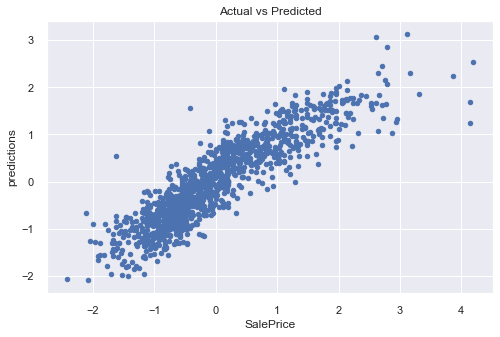

In [235]:
house_copy4_st.plot.scatter(x='SalePrice', y='predictions',\
                      figsize=(8,5), grid=True, title='Actual vs Predicted')

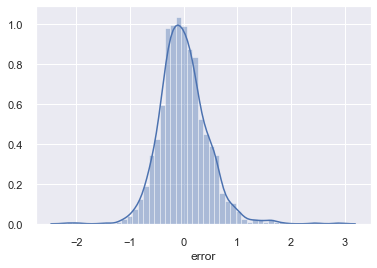

In [236]:
sns.distplot(house_copy4_st['error'])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


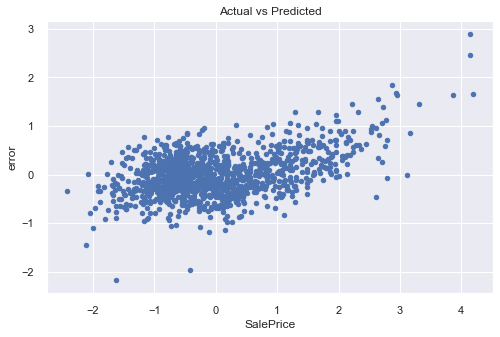

In [237]:
house_copy4_st.plot.scatter(x='SalePrice', y='error',\
                      figsize=(8,5), grid=True, title='Actual vs Predicted')

### Conclusion: Model 2 is the best model with highest R2 of 85%

## 12. Feature Selection Part 2 : Improving Model 2 <br id=section12></br>

### 12.1 Removing Features(instead of combining) where correlation amongst them is > 0.6 <br id=section1201></br>

In [238]:
house_copy2_st.drop(["predictions","error"], axis=1, inplace=True)

In [239]:
corr_matrix4=house_copy2_st.corr().abs()
corr_matrix4['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.777099
GrLivArea        0.663232
YearBuilt        0.603858
ExterQual        0.603023
GarageCars       0.599174
FullBath         0.572070
GarageArea       0.570261
YearRemodAdd     0.559132
TotalBsmtSF      0.558280
BsmtQual         0.545050
KitchenQual      0.525193
1stFlrSF         0.515078
GarageFinish     0.482633
GarageType       0.451785
Foundation       0.440158
HeatingQC        0.439547
TotRmsAbvGrd     0.434430
Fireplaces       0.385644
BsmtFinSF1       0.325653
OpenPorchSF      0.325025
MasVnrArea       0.291451
LotShape         0.262328
CentralAir       0.257505
Electrical       0.255301
LotArea          0.251773
LotFrontage      0.246135
BsmtExposure     0.246097
2ndFlrSF         0.245777
HalfBath         0.244176
MSZoning         0.242149
WoodDeckSF       0.237765
BsmtFullBath     0.228253
PavedDrive       0.209723
GarageYrBlt      0.207880
HouseStyle       0.194972
SaleCondition    0.193938
GarageCond       0.182243
BsmtUnfSF   

In [240]:
high_corr_var=np.where(corr_matrix4>0.6)
high_corr_var=[(corr_matrix4.columns[x],corr_matrix4.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]
high_corr_var

[('OverallQual', 'ExterQual'),
 ('OverallQual', 'SalePrice'),
 ('YearBuilt', 'YearRemodAdd'),
 ('YearBuilt', 'Foundation'),
 ('YearBuilt', 'SalePrice'),
 ('Exterior1st', 'Exterior2nd'),
 ('ExterQual', 'SalePrice'),
 ('BsmtFinType1', 'BsmtFinSF1'),
 ('BsmtFinSF1', 'BsmtFullBath'),
 ('TotalBsmtSF', '1stFlrSF'),
 ('2ndFlrSF', 'GrLivArea'),
 ('2ndFlrSF', 'HalfBath'),
 ('GrLivArea', 'TotRmsAbvGrd'),
 ('GrLivArea', 'SalePrice'),
 ('GarageCars', 'GarageArea')]

In [241]:
house_copy5=house_copy2_st.copy()

In [242]:
house_copy5.drop(["ExterQual","YearBuilt","YearRemodAdd","Exterior1st",'BsmtFinType1',"BsmtFullBath","1stFlrSF","2ndFlrSF", "TotRmsAbvGrd","GarageArea"],axis=1,inplace=True)

In [243]:
corr_matrix5=house_copy5.corr().abs()
high_corr_var=np.where(corr_matrix5>0.6)
high_corr_var=[(corr_matrix5.columns[x],corr_matrix5.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]
high_corr_var

[('OverallQual', 'SalePrice'), ('GrLivArea', 'SalePrice')]

In [244]:
house_copy5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1206 entries, 0 to 1205
Data columns (total 52 columns):
MSZoning         1206 non-null float64
LotFrontage      1206 non-null float64
LotArea          1206 non-null float64
Street           1206 non-null float64
LotShape         1206 non-null float64
LandContour      1206 non-null float64
Utilities        1206 non-null float64
LotConfig        1206 non-null float64
LandSlope        1206 non-null float64
Neighborhood     1206 non-null float64
Condition1       1206 non-null float64
Condition2       1206 non-null float64
BldgType         1206 non-null float64
HouseStyle       1206 non-null float64
OverallQual      1206 non-null float64
RoofStyle        1206 non-null float64
RoofMatl         1206 non-null float64
Exterior2nd      1206 non-null float64
MasVnrType       1206 non-null float64
MasVnrArea       1206 non-null float64
ExterCond        1206 non-null float64
Foundation       1206 non-null float64
BsmtQual         1206 non-null floa

### 12.2 Model 5 <br id=section1202></br>

In [245]:
features= [col for col in house_copy5.columns]
features.remove("SalePrice")
target = ['SalePrice']

In [246]:
from sklearn.model_selection import train_test_split
X_train4, X_test4, y_train4, y_test4 = train_test_split(house_copy5[features], house_copy5[target], test_size=0.33, random_state=5)

In [247]:
lr_model4 = LinearRegression()

In [248]:
lr_model4.fit(X_train4, y_train4)

LinearRegression()

In [249]:
y_pred_train4 = lr_model4.predict(X_train4)
y_pred_test4 = lr_model4.predict(X_test4)   

In [250]:
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train4, y_pred_train4))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test4, y_pred_test4))

In [251]:
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 0.3692594446713839
RMSE for test set is 0.39258553108981015


In [252]:
# r2_score is a standard metric in the sklearn library
r2_train4 = metrics.r2_score(y_train4, y_pred_train4)
r2_test4 = metrics.r2_score(y_test4, y_pred_test4)
print('R-Squared of train data:',r2_train4)
print('R-Squared of test data:',r2_test4)

R-Squared of train data: 0.8654413922082415
R-Squared of test data: 0.840980249502921


### Conclusion:  Removing correlated features increases the  RMSE values of Model 5 slightly as compared to Model 2 (RMSE for training set is 0.353, RMSE for test set is 0.388)

### 12.3 Removing Features with correlation with salePrice < 0.1 <br id= section1203></br>

In [253]:
corr_matrix6=house_copy5.corr().abs()
df=pd.DataFrame(corr_matrix6["SalePrice"].sort_values(ascending=False))

In [254]:
df.reset_index(inplace=True)
df

,index,SalePrice
0,SalePrice,1.000000
1,OverallQual,0.777099
2,GrLivArea,0.663232
3,GarageCars,0.599174
4,FullBath,0.572070
5,TotalBsmtSF,0.558280
6,BsmtQual,0.545050
7,KitchenQual,0.525193
8,GarageFinish,0.482633
9,GarageType,0.451785


In [255]:
to_remove=df["index"].iloc[38:].tolist()

In [256]:
house_copy5.drop((to_remove),axis=1,inplace=True)

In [257]:
house_copy5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1206 entries, 0 to 1205
Data columns (total 38 columns):
MSZoning         1206 non-null float64
LotFrontage      1206 non-null float64
LotArea          1206 non-null float64
LotShape         1206 non-null float64
Neighborhood     1206 non-null float64
HouseStyle       1206 non-null float64
OverallQual      1206 non-null float64
Exterior2nd      1206 non-null float64
MasVnrArea       1206 non-null float64
ExterCond        1206 non-null float64
Foundation       1206 non-null float64
BsmtQual         1206 non-null float64
BsmtCond         1206 non-null float64
BsmtExposure     1206 non-null float64
BsmtFinSF1       1206 non-null float64
BsmtUnfSF        1206 non-null float64
TotalBsmtSF      1206 non-null float64
Heating          1206 non-null float64
HeatingQC        1206 non-null float64
CentralAir       1206 non-null float64
Electrical       1206 non-null float64
GrLivArea        1206 non-null float64
FullBath         1206 non-null floa

### 12.4 Model 6 <br id=section1204></br>

In [258]:
features= [col for col in house_copy5.columns]
features.remove("SalePrice")
target = ['SalePrice']

In [259]:
from sklearn.model_selection import train_test_split
X_train5, X_test5, y_train5, y_test5 = train_test_split(house_copy5[features], house_copy5[target], test_size=0.33, random_state=1)

In [260]:
lr_model5 = LinearRegression()

In [261]:
lr_model5.fit(X_train5, y_train5)

LinearRegression()

In [262]:
y_pred_train5 = lr_model5.predict(X_train5)
y_pred_test5 = lr_model5.predict(X_test5)   

In [263]:
RMSE_train = np.sqrt(metrics.mean_squared_error(y_train5, y_pred_train5))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test5, y_pred_test5))

In [264]:
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 0.3767193830414553
RMSE for test set is 0.3976748248014535


In [265]:
# r2_score is a standard metric in the sklearn library
r2_train5 = metrics.r2_score(y_train5, y_pred_train5)
r2_test5 = metrics.r2_score(y_test5, y_pred_test5)
print('R-Squared of train data:',r2_train5)
print('R-Squared of test data:',r2_test5)

R-Squared of train data: 0.8584843947260096
R-Squared of test data: 0.8408710849374894


### Conclusion:  Removing the features with a low correlation with Sale Price (Corr co-eff of < 0.1) increased the RMSE values slightly (RMSE for training set is 0.376, RMSE for test set is 0.397) where as for Model 5, RMSE for training set is 0.369 RMSE for test set is 0.392 and for Model 2 , RMSE for training set is 0.353, RMSE for test set is 0.388.

### 12.5 Testing Model 6 for heteroscedasticity <br id=section1305></br>

In [266]:
X = house_copy5[features]
y= house_copy5.SalePrice

In [267]:
lr_model5.fit (X,y)

LinearRegression()

In [268]:
y_pred = lr_model5.predict(X)

In [269]:
house_copy5['predictions'] = y_pred

In [270]:
house_copy5['error'] = house_copy5['SalePrice'] - house_copy5['predictions']

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


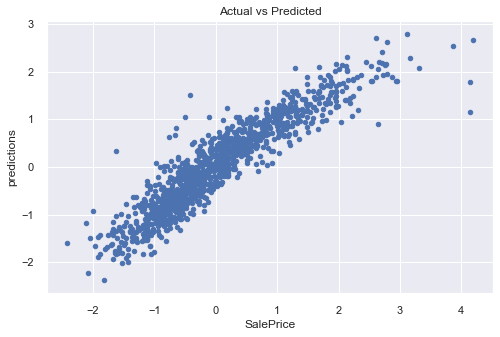

In [271]:
house_copy5.plot.scatter(x='SalePrice', y='predictions',\
                      figsize=(8,5), grid=True, title='Actual vs Predicted')

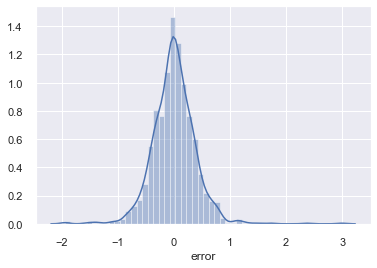

In [272]:
sns.distplot(house_copy5['error'])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


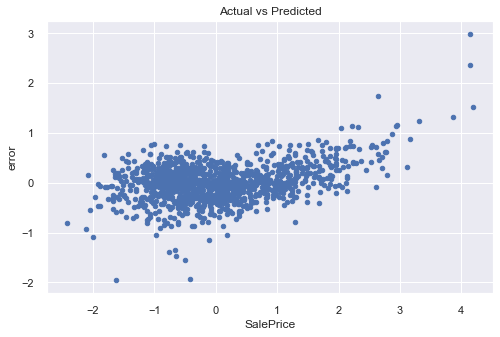

In [273]:
house_copy5.plot.scatter(x='SalePrice', y='error',\
                      figsize=(8,5), grid=True, title='Actual vs Predicted')

### Conclusion:  Feature selection has no effect on the heterscedasticity of the model

## 13. Final Conclusions <br id=section13></br>

1. The best Model out of the 6 tested models is Model 2 (based on RMSE values)
2. The Model takes into account 62 features instead of 81 (initial dataset) 
3. Feature Engineering tried in this notebook deteriorated the model and also increased the heteroscedasticity      
   significantly(Model 3)
4. Standaridisation did not improve the model much but also did not worsen the model (Model 4)
5. Feature Selection (Removing correlated features and features having low correlation with Sale Price (Corr Coeff < 0.1)) increased the RMSE values, though only slightly but did not increase the heteroscedasticity (Models 5 & 6)
6. There is room for improving the model by trying several things: 
    a) Adding the Features that were removed in the beginning 
    b) Trying other ways of Feature Engineering 
    c) Trying different combination of engineered features 
    d) Remove Multicolinearlity using other methods like PCA